<h1 style="background-color:#87CEFA	;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 10x 50px;">Table des matières</h1>





* [1. Libraries](#1)


* [2. Exploration des données](#2)


* [3. Preprocess et étiquetage des données](#3)


* [4. Deuxième approche de résolution](#4)






<a id='1'></a>

<h1 style="background-color:#87CEFA	;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Librairies</h1>

In [1]:
!pip install vaderSentiment

In [2]:
! pip install textblob

In [3]:
! pip install -U pandasql


In [4]:
! pip install nltk

In [5]:
! pip install spacy

In [ ]:
! pip install textblob_fr


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline 
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import string
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_word_en=stopwords.words()
stop_word_fr=stopwords.words('french')
stop_word=stop_word_en+stop_word_en
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

# import spacy
from gensim import corpora, models, similarities
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import collections


from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adminn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<a id='2'></a>

<h1 style="background-color:#87CEFA	;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Exploration des données</h1>

![](https://i.pinimg.com/originals/e0/2f/31/e02f319e566acc11cbff272c16a650e1.gif)

In [798]:
data=pd.read_json('../Data/datasetProjet2022.json')
data.head(5)

user_lang tweet_coordinates_geojson  loc_point_geojson  doublon country  \
0      None                      None                NaN    False    None   
1      None                      None                NaN    False    None   
2      None                      None                NaN    False    None   
3      None                      None                NaN    False    None   
4      None                      None                NaN    False    None   

                                        tweet_source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/android" ...   
2  <a href="https://mobile.twitter.com" rel="nofo...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

   tweet_current_user_retweet user_location tweet_coordinates_geom  \
0                        -1.0          None                   None   
1                        -1.0          None                   None   
2                        -1.0        France                   None   
3                        -1.0          None                   None   
4                        -1.0         94uzi                   None   

   user_geo_enabled  ... user_friends_count  tweet_coordinates  \
0               0.0  ...             4997.0               None   
1               0.0  ...              654.0               None   
2               0.0  ...              321.0               None   
3               1.0  ...             2027.0               None   
4               1.0  ...              526.0               None   

        tweet_mtion tweet_lang id_filtre tweet_favorite_count  \
0              None         fr        63                  0.0   
1              None         fr        63                  0.0   
2  HuetSylvestre ;          fr        63                  0.0   
3              None         fr        63                  0.0   
4              None         fr        63                  0.0   

   user_listed_counted             tweet_id  place_bbox_geom  user_utc_offset  
0                 41.0  1154707909470801920             None             -1.0  
1                  0.0  1154708887871922177             None             -1.0  
2                  0.0  1154709490442342400             None             -1.0  
3                103.0  1154711387345735680             None             -1.0  
4                339.0  1154722470986997761             None             -1.0  

[5 rows x 44 columns]

In [799]:
seisme_df=pd.read_csv('../Data/Liste_seismes_2017-2022.csv',sep=';')
seisme_df.head(5)

Date Heure            Localisation  Latitude  Longitude  \
0  2017-02-20 17:03:41.57              ENE Orthez   43.4917    -0.6465   
1  2017-04-26 15:12:10.88  SW Bagnères-de-Bigorre   42.9811     0.1370   
2  2017-05-08 02:08:27.15       NE Argelès-Gazost   43.0347     0.0206   
3  2017-09-28 01:43:22.76                 O Janzé   47.9614    -1.4372   
4  2017-10-25 03:41:17.67          SW Albertville   45.4286     6.3180   

   Profondeur Type Magnitude  Magnitude  IdSei (franceseisme)  \
0         5.0            MLv        3.5                   659   
1         7.7            MLv        3.7                   669   
2         7.5            MLv        3.4                   673   
3         4.5            MLv        3.9                   690   
4         3.1            MLv        3.7                   696   

   Intensite EMS98 maximale  
0                       5.0  
1                       4.0  
2                       4.0  
3                       4.0  
4                       4.5

In [800]:
print('la taille des données de tweets {}'.format(data.shape))
print('la taille des seismes {}'.format(seisme_df.shape))

la taille des données de tweets (517301, 44)
la taille des seismes (46, 9)


In [801]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517301 entries, 0 to 517300
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   user_lang                    208530 non-null  object        
 1   tweet_coordinates_geojson    2240 non-null    object        
 2   loc_point_geojson            0 non-null       float64       
 3   doublon                      517301 non-null  bool          
 4   country                      12283 non-null   object        
 5   tweet_source                 517301 non-null  object        
 6   tweet_current_user_retweet   506405 non-null  float64       
 7   user_location                394636 non-null  object        
 8   tweet_coordinates_geom       2240 non-null    object        
 9   user_geo_enabled             512059 non-null  float64       
 10  hashtags                     139703 non-null  object        
 11  user_favorites_count      

In [802]:
# recherche des valeurs manquantes des colonnes.

def missing_values(data):
    
    total=(data.isnull().sum().sort_values(ascending=False))
    percent_missing=(total/data.isnull().count()).sort_values(ascending=False)
    missin_df=pd.concat([total,percent_missing],keys=['total_missing','percent_missing'],axis=1)
    return missin_df

In [803]:
missing_values(data)

total_missing  percent_missing
indice_localisation                 517301         1.000000
loc_point_geojson                   517301         1.000000
loc_geojson                         517301         1.000000
localisation                        517301         1.000000
tweet_coordinates_geom              515061         0.995670
tweet_coordinates_longitude         515061         0.995670
tweet_coordinates_geojson           515061         0.995670
tweet_coordinates_latitude          515061         0.995670
tweet_coordinates                   515061         0.995670
place_bbox                          505228         0.976662
place_bbox_polygon                  505222         0.976650
place_bbox_geom                     505222         0.976650
place_bbox_geojson                  505222         0.976650
place_fullname                      505018         0.976256
place_type                          505018         0.976256
country_code                        505018         0.976256
place_name                          505018         0.976256
country                             505018         0.976256
id_evt                              447306         0.864692
hashtags                            377598         0.729939
tweet_mtion                         372420         0.719929
user_time_zone                      351377         0.679251
user_lang                           308771         0.596888
user_location                       122665         0.237125
tweet_quoted_status_id               10896         0.021063
tweet_current_user_retweet           10896         0.021063
user_utc_offset                       6874         0.013288
tweet_retweet_count                   5242         0.010133
user_followers_count                  5242         0.010133
user_listed_counted                   5242         0.010133
tweet_favorite_count                  5242         0.010133
user_friends_count                    5242         0.010133
user_statuses_count                   5242         0.010133
user_geo_enabled                      5242         0.010133
user_favorites_count                  5242         0.010133
tweet_text                               0         0.000000
tweet_source                             0         0.000000
tweet_lang                               0         0.000000
id_filtre                                0         0.000000
id_alea                                  0         0.000000
tweet_created_at                         0         0.000000
tweet_id                                 0         0.000000
doublon                                  0         0.000000
robot                                    0         0.000000

### Remarques: 

- Le pourcentage de valeurs maquantes atteints les 100%, pour certaine valeur
- La valeur **id_evt** considérée comme notre **target** possède **86% des valeurs sont nulles**

In [15]:
# découverte des différents colonnes et leurs valeurs

for c in data.columns:
    print('--------------')
    print('la colonne {} est de type {}'.format(c,data[c].dtype))
    print(data[c].unique())

--------------
la colonne user_lang est de type object
[None 'fr' 'en' 'tr' 'nl' 'es' 'ja' 'en-gb' 'ru' 'de' 'it' 'pt' 'hu'
 'zh-cn' 'ar' 'ro' 'vi' 'el' 'sr' 'id' 'gl' 'sv' 'fa' 'he' 'ko' 'en-GB'
 'fi' 'ca' 'fil' 'xx-lc' 'pl' 'cs' 'bg' 'th' 'zh-tw' 'zh-CN' 'hi' 'ms'
 'no' 'eu' 'da' 'fr-CA' 'es-MX' 'hr' 'ta']
--------------
la colonne tweet_coordinates_geojson est de type object
[None '{"type":"Point","coordinates":[-149.62,62.228]}'
 '{"type":"Point","coordinates":[-149.294,62.632]}' ...
 '{"type":"Point","coordinates":[-97.464,-33.503]}'
 '{"type":"Point","coordinates":[-150.793,62.515]}'
 '{"type":"Point","coordinates":[-150.008,62.171]}']
--------------
la colonne loc_point_geojson est de type float64
[nan]
--------------
la colonne doublon est de type bool
[False  True]
--------------
la colonne country est de type object
[None 'Turquie' 'France' 'Solomon Islands' 'United States' 'Cameroon'
 "People's Republic of China" 'Republic of the Philippines'
 'United Arab Emirates' 'Madagas

[    nan  62.228  62.632 ...  18.028  11.764 -33.503]
--------------
la colonne indice_localisation est de type float64
[nan]
--------------
la colonne user_statuses_count est de type float64
[49536. 15821.   336. ... 56813. 54648. 38026.]
--------------
la colonne place_bbox est de type object
[None '[[Ltwitter4j.GeoLocation;@1116f31'
 '[[Ltwitter4j.GeoLocation;@64f8ea6d' ...
 '[[Ltwitter4j.GeoLocation;@a1b3167' '[[Ltwitter4j.GeoLocation;@39022339'
 '[[Ltwitter4j.GeoLocation;@6601db95']
--------------
la colonne user_time_zone est de type object
[None 'null' 'Pacific Time (US & Canada)' 'Paris' 'La Paz' 'Athens'
 'Nairobi' 'St. Petersburg' 'Arizona' 'Hawaii' 'Amsterdam' 'Ljubljana'
 'Greenland' 'Europe/Paris' 'Istanbul' 'Atlantic Time (Canada)' 'Brussels'
 'Belgrade' 'Brisbane' 'Baghdad' 'West Central Africa' 'Abu Dhabi'
 'Eastern Time (US & Canada)' 'Taipei' 'America/Toronto' 'Mexico City'
 'Central Time (US & Canada)' 'Santiago' 'Midway Island' 'Rome' 'Baku'
 'Tokyo' 'Osaka' 'Buenos

### Remarques

- Plusieurs colonnes peuvent nous intéresser mise à part id_evt et les tweets, **on pourra utiliser tweet_retweet_text,tweet_favorite_count...**

In [804]:
# séparation des valeurs catégoriques et des valeurs objects

numerical_data=data.select_dtypes(exclude=['object'])
categorical_data=data.select_dtypes(include=['object'])
print('shape de nos données numerique {}'.format(numerical_data.shape))
print('shape de nos données numerique {}'.format(categorical_data.shape))

shape de nos données numerique (517301, 24)
shape de nos données numerique (517301, 20)


In [805]:
numerical_data.head(2)

loc_point_geojson  doublon  tweet_current_user_retweet  user_geo_enabled  \
0                NaN    False                        -1.0               0.0   
1                NaN    False                        -1.0               0.0   

   user_favorites_count    tweet_created_at  tweet_retweet_count  \
0               37990.0 2019-07-26 12:59:53                  0.0   
1                9010.0 2019-07-26 13:03:46                  0.0   

   user_followers_count  tweet_coordinates_longitude  robot  ...  loc_geojson  \
0                2036.0                          NaN  False  ...          NaN   
1                 534.0                          NaN  False  ...          NaN   

   localisation  id_evt  id_alea  user_friends_count  id_filtre  \
0           NaN     NaN        1              4997.0         63   
1           NaN     NaN        1               654.0         63   

   tweet_favorite_count  user_listed_counted             tweet_id  \
0                   0.0                 41.0  1154707909470801920   
1                   0.0                  0.0  1154708887871922177   

   user_utc_offset  
0             -1.0  
1             -1.0  

[2 rows x 24 columns]

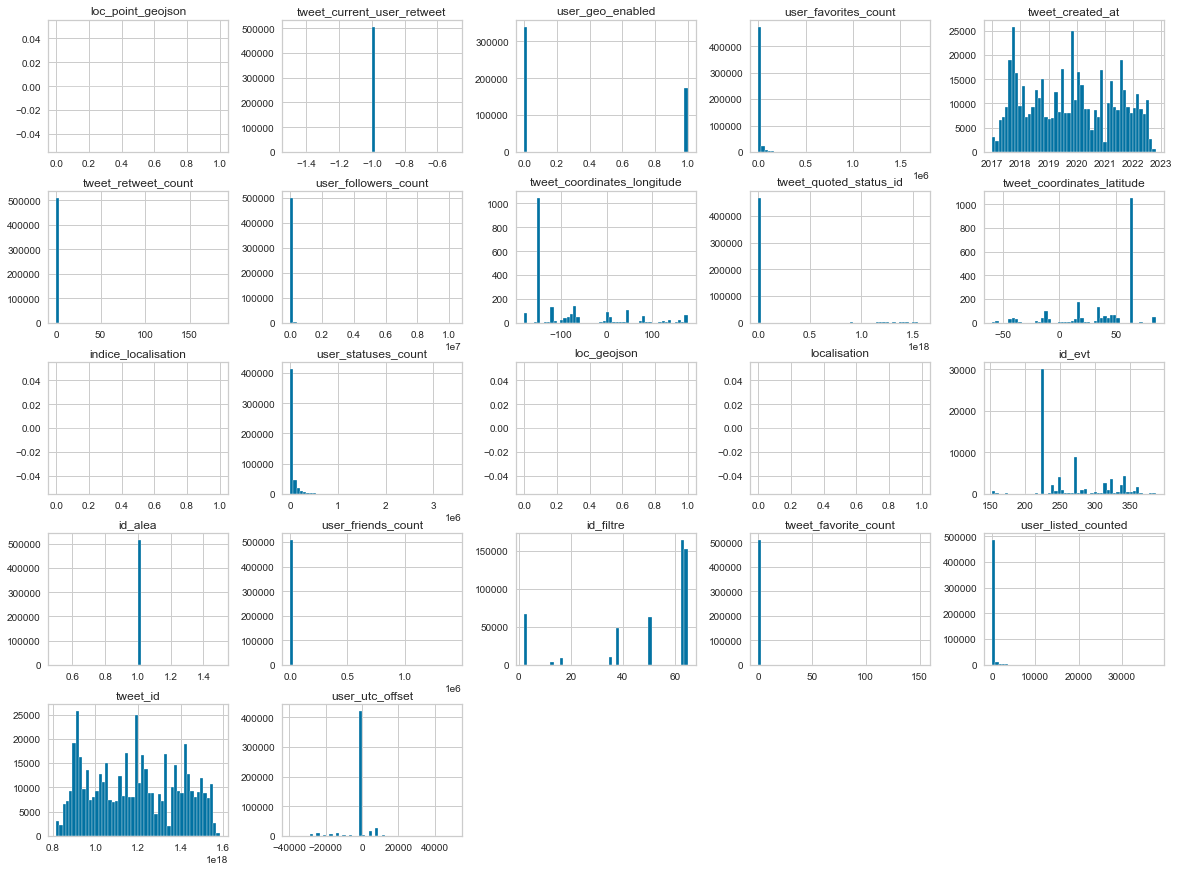

In [806]:
numerical_data.hist(bins=50,figsize=(20,15))
plt.show()


In [20]:
mssing=missing_values(numerical_data)

In [21]:
numerical_data.drop(mssing[mssing['percent_missing']>0.9].index,axis=1,inplace=True)

In [22]:
numerical_data.drop('tweet_id',axis=1,inplace=True)
numerical_data

doublon  tweet_current_user_retweet  user_geo_enabled  \
0         False                        -1.0               0.0   
1         False                        -1.0               0.0   
2         False                        -1.0               0.0   
3         False                        -1.0               1.0   
4         False                        -1.0               1.0   
...         ...                         ...               ...   
517296    False                        -1.0               1.0   
517297    False                        -1.0               1.0   
517298    False                        -1.0               1.0   
517299    False                        -1.0               0.0   
517300    False                        -1.0               0.0   

        user_favorites_count    tweet_created_at  tweet_retweet_count  \
0                    37990.0 2019-07-26 12:59:53                  0.0   
1                     9010.0 2019-07-26 13:03:46                  0.0   
2                      889.0 2019-07-26 13:06:10                  0.0   
3                    45052.0 2019-07-26 13:13:42                  0.0   
4                     2845.0 2019-07-26 13:57:45                  0.0   
...                      ...                 ...                  ...   
517296                 901.0 2019-07-26 12:49:09                  0.0   
517297                1200.0 2019-07-26 12:55:10                  0.0   
517298                1141.0 2019-07-26 12:56:43                  0.0   
517299                  10.0 2019-07-26 12:58:07                  0.0   
517300                4607.0 2019-07-26 12:59:05                  0.0   

        user_followers_count  robot  tweet_quoted_status_id  \
0                     2036.0  False           -1.000000e+00   
1                      534.0  False           -1.000000e+00   
2                      137.0  False           -1.000000e+00   
3                     2423.0  False           -1.000000e+00   
4                     3321.0  False            1.154527e+18   
...                      ...    ...                     ...   
517296               44018.0  False           -1.000000e+00   
517297                 532.0  False           -1.000000e+00   
517298                 302.0  False           -1.000000e+00   
517299                 140.0  False           -1.000000e+00   
517300                1258.0  False           -1.000000e+00   

        user_statuses_count  id_evt  id_alea  user_friends_count  id_filtre  \
0                   49536.0     NaN        1              4997.0         63   
1                   15821.0     NaN        1               654.0         63   
2                     336.0     NaN        1               321.0         63   
3                   23866.0     NaN        1              2027.0         63   
4                  159961.0     NaN        1               526.0         63   
...                     ...     ...      ...                 ...        ...   
517296              40601.0     NaN        1              1257.0         63   
517297               1891.0     NaN        1               599.0         63   
517298              38026.0     NaN        1               383.0         63   
517299               1109.0     NaN        1                 0.0         63   
517300              67722.0     NaN        1               766.0         63   

        tweet_favorite_count  user_listed_counted  user_utc_offset  year  
0                        0.0                 41.0             -1.0  2019  
1                        0.0                  0.0             -1.0  2019  
2                        0.0                  0.0             -1.0  2019  
3                        0.0                103.0             -1.0  2019  
4                        0.0                339.0             -1.0  2019  
...                      ...                  ...              ...   ...  
517296                   0.0                525.0             -1.0  2019  
517297                   0.0                

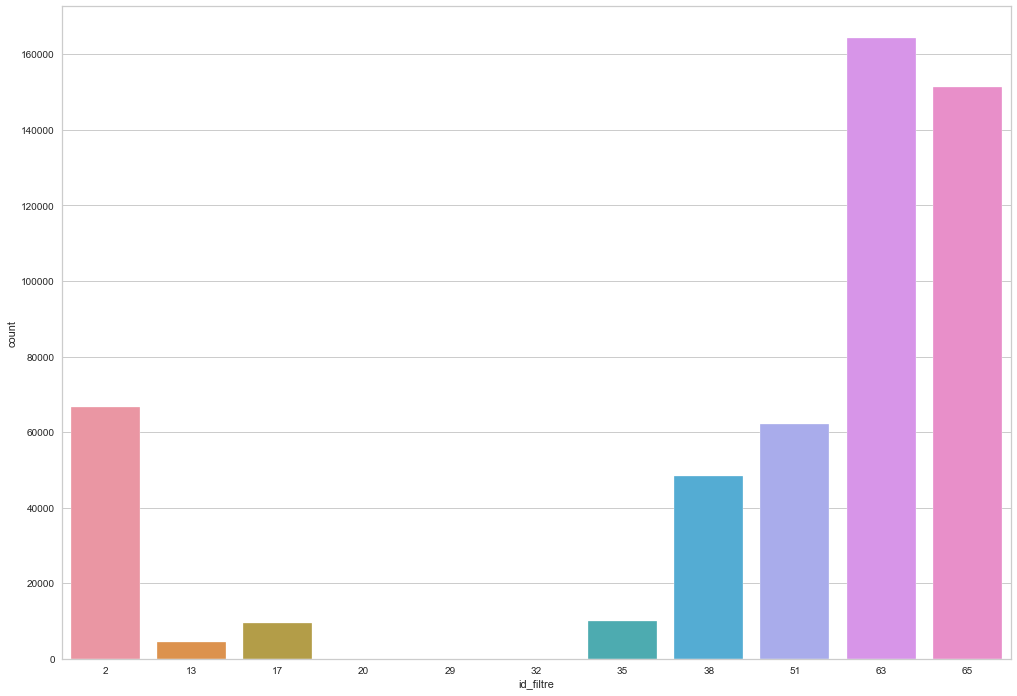

In [807]:
plt.figure(figsize=(17,12))
sns.countplot(data=numerical_data,x='id_filtre')
plt.show()

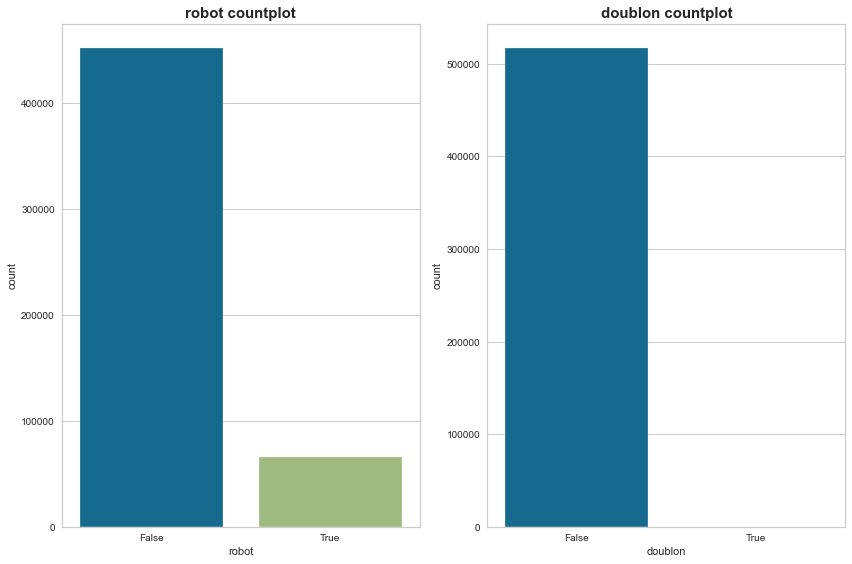

In [808]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(12,8))
sns.countplot(data=numerical_data,x='robot',ax=axes[0])
axes[0].set_title('robot countplot',fontweight='bold',fontsize=15)
sns.countplot(data=numerical_data,x='doublon',ax=axes[1])
axes[1].set_title('doublon countplot',fontweight='bold',fontsize=15)
fig.tight_layout()
plt.show()


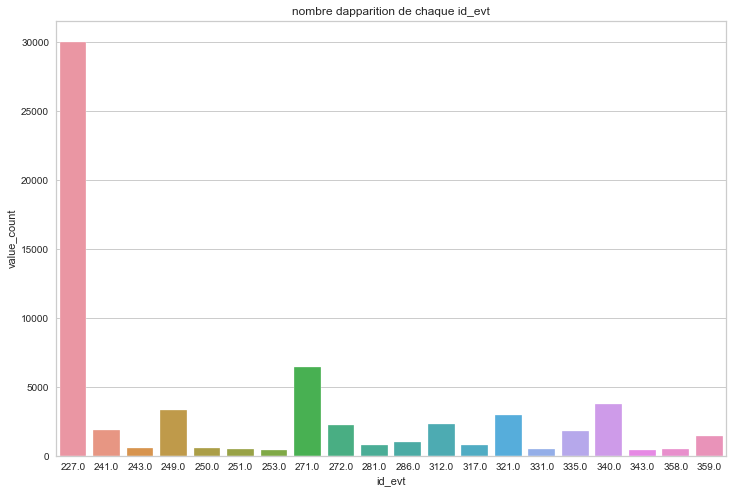

In [819]:
count_id_evt=pd.DataFrame(numerical_data.id_evt.value_counts().reset_index())
count_id_evt.columns=['id_evt','value_count']
count_top_id_evt=count_id_evt.sort_values(by='value_count',ascending=False)[:20]

plt.figure(figsize=(12,8))
sns.barplot(data=count_top_id_evt,y='value_count',x='id_evt')
plt.title('nombre dapparition de chaque id_evt',fontsize=12)

plt.show()

In [822]:
# création de la colonne année

numerical_data['year']=numerical_data['tweet_created_at'].dt.year

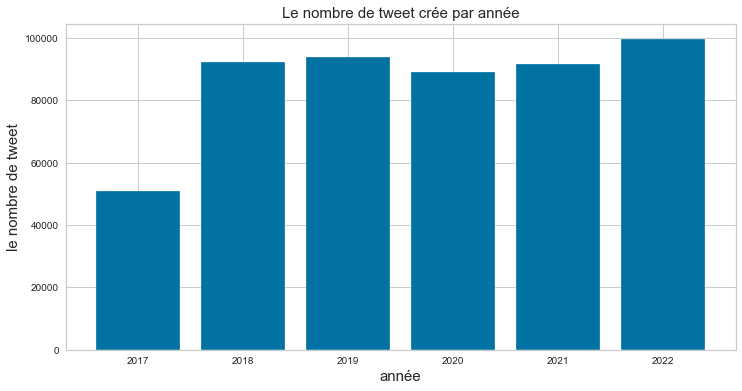

In [824]:
numerical_data['year']=numerical_data['tweet_created_at'].dt.year

plt.figure(figsize=(12,6))


plt.bar(numerical_data['year'].unique(),numerical_data.groupby('year')['year'].count())

plt.xlabel('année',fontsize=15)
plt.ylabel('le nombre de tweet',fontsize=15)

plt.title('Le nombre de tweet crée par année',fontsize=15)


plt.show()

In [826]:
data['date']=data['tweet_created_at'].dt.date

data['time_date'] = pd.to_datetime(data['tweet_created_at'], utc=True)

data.set_index('time_date', inplace=True)


def counter(x):
     return pd.Series(dict(Number_of_tweets = x['tweet_text'].count(), 
                        ))
daily_count=data.groupby(data.index.date).apply(counter)
daily_count.index.name='date'
daily_count.reset_index(inplace=True)
daily_count['date']=daily_count['date'].astype('datetime64[ns]')
daily_count['year']=daily_count.date.dt.year
daily_count['month']=daily_count.date.dt.month

px.box(daily_count,x="year",y='Number_of_tweets',color='month',title="le nombre de tweets crée chaque année et par mois")

# Remarque:

- On remarque que le mois d'Aout 2017, le mois de novembre de 2019, le mois d'octobre et d'aout 2021 présentent des valeurs abérantes

Text(0.5, 1.0, 'Distribution mensuelle des tweets')

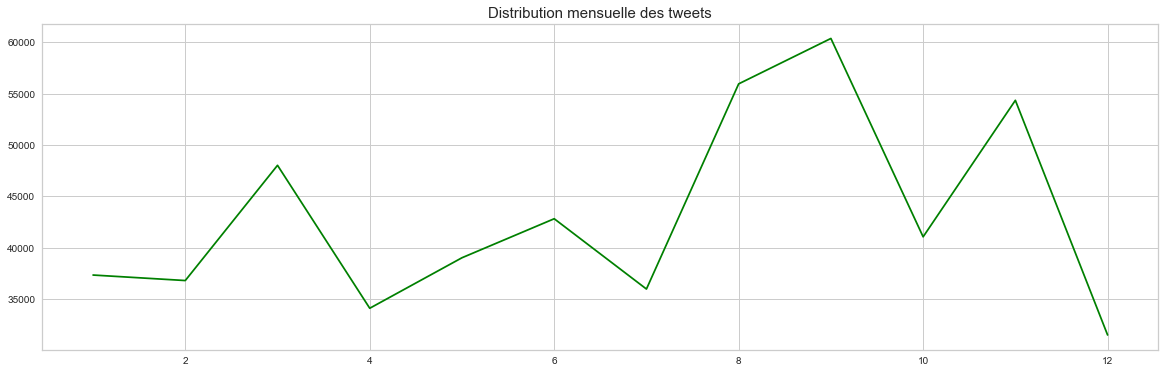

In [894]:
time = data.groupby(['tweet_created_at']).size()
monthly = data['tweet_created_at'].dt.month.value_counts().sort_index()
plt.figure(figsize=(20,6))
sns.lineplot(x=monthly.index, y = monthly.values, color='green')
plt.title('Distribution mensuelle des tweets', fontsize=15)

In [827]:
# Découverte des données seismes

seisme_df['Date Heure']=seisme_df['Date Heure'].astype('datetime64[ns]')
seisme_df['date']=pd.to_datetime(seisme_df['Date Heure'].dt.date)
seisme_df['year']=seisme_df.date.dt.year
seisme_df['month']=seisme_df.date.dt.month
a=seisme_df.set_index('date').resample('M')['Intensite EMS98 maximale'].mean().reset_index()
a['year']=a.date.dt.year
a['Intensite EMS98 maximale'].fillna(0,inplace=True)# on remplace la valeur pour une date non présente par 0

px.line(a,x='date',y='Intensite EMS98 maximale',color='year',title="Moyenne Intensité EMS98 maximale par mois")

In [144]:
# datacop=data.copy()
# datacop['date']=datacop['date'].astype(str)
# info_17=datacop[datacop['date']<='2017-12-31'][['date','id_evt']]
# info_17['id_evt_new']=np.where(info_17['id_evt']>0,1,'non_determine')
# balance_counts

non_determine    92948
1                  845
Name: id_evt_new, dtype: int64

# Text Analysis

In [808]:
categorical_data.head(5)

user_lang tweet_coordinates_geojson country  \
0      None                      None    None   
1      None                      None    None   
2      None                      None    None   
3      None                      None    None   
4      None                      None    None   

                                        tweet_source user_location  \
0  <a href="http://twitter.com/download/iphone" r...          None   
1  <a href="http://twitter.com/download/android" ...          None   
2  <a href="https://mobile.twitter.com" rel="nofo...        France   
3  <a href="http://twitter.com/download/iphone" r...          None   
4  <a href="http://twitter.com/download/iphone" r...         94uzi   

  tweet_coordinates_geom              hashtags  \
0                   None  séisme ; Istanbul ;    
1                   None                  None   
2                   None                  None   
3                   None                  None   
4                   None                  None   

                                          tweet_text country_code place_name  \
0  Un #séisme majeur menace #Istanbul – {Sciences...         None       None   
1  Tremblement de terre M3.1 - FRANCE - 31km de L...         None       None   
2  Un séisme majeur menace Istanbul – {Sciences²}...         None       None   
3  Un séisme majeur menace Istanbul – {Sciences²}...         None       None   
4   je suis morte ça crie comme si y avait un séisme         None       None   

  place_bbox user_time_zone place_bbox_polygon place_bbox_geojson place_type  \
0       None           None               None               None       None   
1       None           None               None               None       None   
2       None           None               None               None       None   
3       None           None               None               None       None   
4       None           None               None               None       None   

  place_fullname tweet_coordinates       tweet_mtion tweet_lang  \
0           None              None              None         fr   
1           None              None              None         fr   
2           None              None  HuetSylvestre ;          fr   
3           None              None              None         fr   
4           None              None              None         fr   

  place_bbox_geom  
0            None  
1            None  
2            None  
3            None  
4            None

In [39]:
i=data.reset_index().sample(1).index[0]
print(data['tweet_text'].iloc[i])
print('----------------')
print(data['id_evt'].iloc[i])

1.6 magnitude #earthquake. 28 km from Y, AK, #UnitedStates https://t.co/cOWJ5Z2SCh
----------------
nan


In [40]:
# clean tweet text
def clean_tweets(text):
    #suppresion des mentions
    text=re.sub(r'@[A-Za-z0-9]+','',text)
    #suppression des hashtags
    text=re.sub(r'#',"",text)
    #suppresion des retweet
    text=re.sub(r'RT[\s]+','',text)
    #supression des hypers link
    text=re.sub(r'https?:\/\/\S+','',text)
    return text
categorical_data['clean_tweets']=categorical_data['tweet_text'].apply(clean_tweets)

In [41]:
# verification des changement 
i=categorical_data.sample(1).index[0]
print('text originnal : {}'.format(categorical_data['tweet_text'].iloc[i]))
print('------------------modification-----------------')
print('text modifié : {}'.format(categorical_data['clean_tweets'].iloc[i]))

text originnal : #Mexique : un violent #séisme au fait au moins 224 morts à Mexico et dans la région https://t.co/WE6diXVoX2 https://t.co/aYMiUFlrMB
------------------modification-----------------
text modifié : Mexique : un violent séisme au fait au moins 224 morts à Mexico et dans la région  


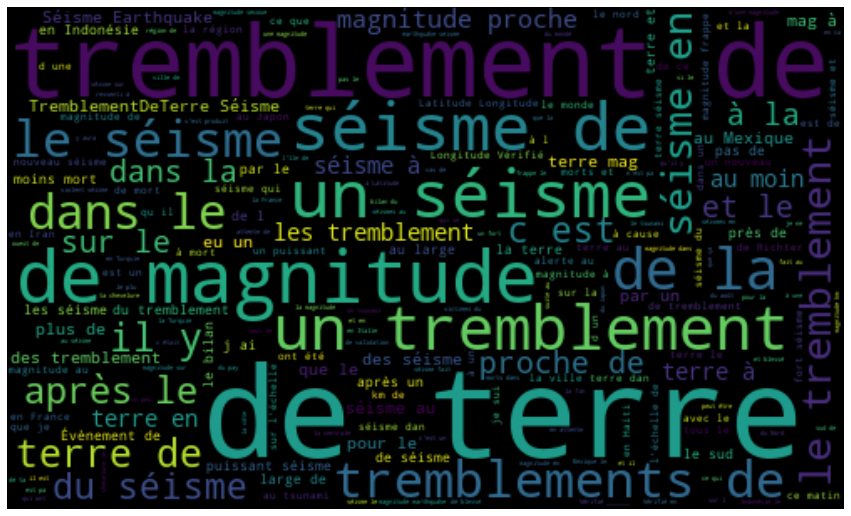

In [42]:
plt.figure(figsize=(15,12))

joinword=''.join([t for t in categorical_data['clean_tweets']])

wordcloud=WordCloud(random_state=42,width=500,height=300).generate(joinword)

plt.imshow(wordcloud,interpolation='bilinear')

plt.axis('off')
plt.show()

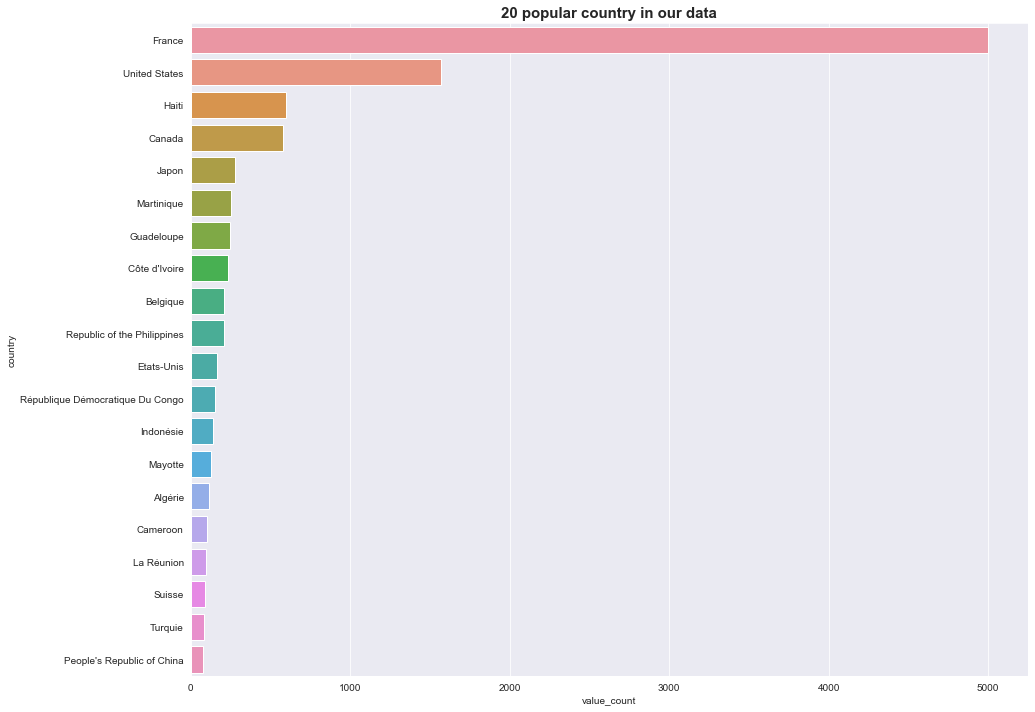

In [43]:
plt.figure(figsize=(15,12))
country_count=categorical_data['country'].value_counts().reset_index()
country_count.columns=['country','value_count']
sns.barplot(data=country_count[:20],y='country',x='value_count')
plt.title('20 popular country in our data',fontweight='bold',fontsize=15)
plt.show()

In [901]:
b = data['hashtags'].value_counts()[:][1:40].index.tolist()
a = data['hashtags'].value_counts()[:][1:40].tolist()
row = pd.DataFrame({'scenario' : []})
row["scenario"] = b
row["nombre"] = a
fig = px.treemap(row, path= ["scenario"], values="nombre",title='arbre de hashtag')
fig.show()

<a id='3'></a>

<h1 style="background-color:#87CEFA	;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Preprocess et étiquetage des données</h1>

# Introduction 

- chihaja nbdaw biha la partie 

In [902]:
data.reset_index(inplace=True)

In [903]:
# fonction pour le calcul du nombre de hashtag et le nombre de mentions ou tags.
def count_hashtags(string):

    words = string.split()  #on divise un string par l'espace
    
    hashtags = [word for word in words if word.startswith('#')] #on extrait seulement les hashtags
    
    return (len(hashtags)) #retourne len de la liste des hashtags

def count_mentions(string):

    words = string.split()
    
    mentions = [word for word in words if word.startswith('@')]
    
    return (len(mentions))

In [904]:
data['len_hashtags']=data['tweet_text'].apply(count_hashtags)
data['len_mentions']=data['tweet_text'].apply(count_mentions)

In [905]:
#verification des transformations

i=data.sample(1).index[0]

print('hashtags donnée {}'.format(data['hashtags'].iloc[i]))
print('----------------')
print('length trouvé {} '.format(data['len_hashtags'].iloc[i]))

hashtags donnée None
----------------
length trouvé 0 


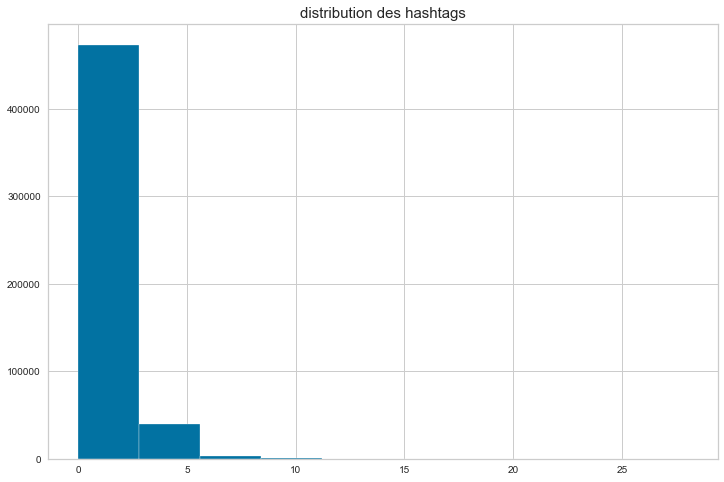

In [906]:
plt.figure(figsize=(12,8))
data['len_hashtags'].hist()
plt.title('distribution des hashtags',fontsize=15)
plt.show()


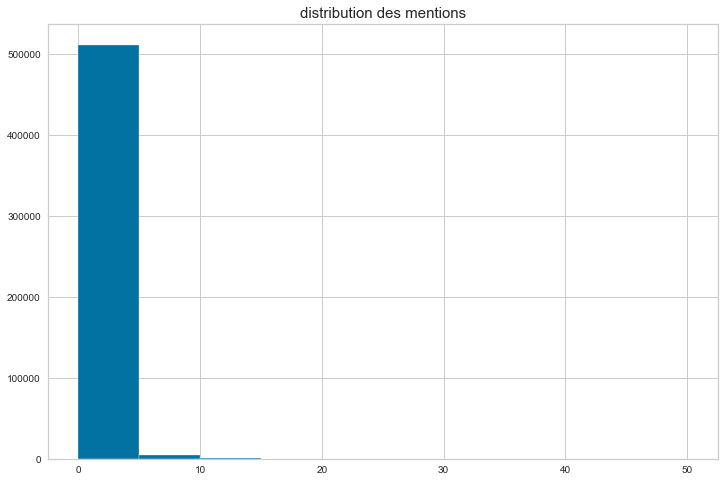

In [907]:
plt.figure(figsize=(12,8))
data['len_mentions'].hist()
plt.title('distribution des mentions',fontsize=15)
plt.show()

## Création de nouveau feature 

In [908]:
def create_features(df):
    
    df['num_mot']=df['tweet_text'].apply(lambda x: len(str(x).split())) #calcul du nombre de mot avec stop_word
    
    df["mot_unique"]=df["tweet_text"].apply(lambda x: len(set(str(x).split()))) #calcul des nombres de mots uniques
    df['num_stop_word']=df['tweet_text'].apply(lambda x:
                                              len([w for w in str(x).lower().split() if w in STOPWORDS])) #nombre de stop words
    df['num_url']=df['tweet_text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w])) #nombre de hashtags utilisé
    
    df['moy_mot']=df['tweet_text'].apply(lambda x:np.mean([len(w) for w in str(x).split()])) #la moyenne des mot utilisés
    
    df['nom_chara']=df['tweet_text'].apply(lambda x: len(str(x))) # le nombre de charactere utilisé
    
    df['nombre_punc']=df['tweet_text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation])) # nombre de ponctuation
    df['nombre_mention']=df['tweet_mtion'].apply(lambda x:len(x) if x is not None else 0) #nombre de mention 
    df['num_point_exclamation'] = df['tweet_text'].apply(lambda x: x.count('!')) #nombre de point d'exclamation
    df['num_point_interrogation'] = df['tweet_text'].apply(lambda x: x.count('?'))#nombre de point interogation
    df['Non Alphanumeric'] = df['tweet_text'].str.findall(r'[^a-zA-Z0-9 ]').str.len()

    
    return df

In [909]:
data=create_features(data)
data.head(5)

index                 time_date user_lang tweet_coordinates_geojson  \
0      0 2019-07-26 12:59:53+00:00      None                      None   
1      1 2019-07-26 13:03:46+00:00      None                      None   
2      2 2019-07-26 13:06:10+00:00      None                      None   
3      3 2019-07-26 13:13:42+00:00      None                      None   
4      4 2019-07-26 13:57:45+00:00      None                      None   

   loc_point_geojson  doublon country  \
0                NaN    False    None   
1                NaN    False    None   
2                NaN    False    None   
3                NaN    False    None   
4                NaN    False    None   

                                        tweet_source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/android" ...   
2  <a href="https://mobile.twitter.com" rel="nofo...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

   tweet_current_user_retweet user_location  ... num_stop_word  num_url  \
0                        -1.0          None  ...             0        1   
1                        -1.0          None  ...             1        2   
2                        -1.0        France  ...             1        1   
3                        -1.0          None  ...             0        1   
4                        -1.0         94uzi  ...             0        0   

    moy_mot  nom_chara nombre_punc nombre_mention num_point_exclamation  \
0  8.125000         72           9              0                     0   
1  5.583333        236          31              0                     0   
2  5.487805        266          16             16                     0   
3  7.875000         70           7              0                     0   
4  3.454545         48           0              0                     0   

  num_point_interrogation                                       tweets_clean  \
0                       0    Un séisme majeur menace Istanbul – {Sciences²}    
1                       0  Tremblement de terre M3.1 - FRANCE - 31km de L...   
2                       0  Un séisme majeur menace Istanbul – {Sciences²}...   
3                       0    Un séisme majeur menace Istanbul – {Sciences²}    
4                       0   je suis morte ça crie comme si y avait un séisme   

   Non Alphanumeric  
0                12  
1                33  
2                28  
3                10  
4                 2  

[5 rows x 62 columns]

In [911]:
# description statistique des données
data[['num_mot','mot_unique','num_stop_word','num_url','moy_mot','nom_chara','nombre_punc','nombre_mention','num_point_exclamation','num_point_interrogation','Non Alphanumeric']].describe()

num_mot     mot_unique  num_stop_word        num_url  \
count  517301.000000  517301.000000  517301.000000  517301.000000   
mean       20.632893      19.027181       0.329211       0.664246   
std        12.269436      10.471947       0.721126       0.674684   
min         1.000000       1.000000       0.000000       0.000000   
25%        12.000000      12.000000       0.000000       0.000000   
50%        16.000000      16.000000       0.000000       1.000000   
75%        27.000000      25.000000       0.000000       1.000000   
max       108.000000     104.000000      26.000000       7.000000   

             moy_mot      nom_chara    nombre_punc  nombre_mention  \
count  517301.000000  517301.000000  517301.000000   517301.000000   
mean        5.987316     136.248992       8.438464        6.164952   
std         1.558421      73.784946       5.771885       18.960890   
min         1.714286       6.000000       0.000000        0.000000   
25%         4.923077      85.000000       4.000000        0.000000   
50%         5.722222     118.000000       8.000000        0.000000   
75%         6.750000     171.000000      12.000000       10.000000   
max        92.333333     937.000000     155.000000      748.000000   

       num_point_exclamation  num_point_interrogation  Non Alphanumeric  
count          517301.000000            517301.000000     517301.000000  
mean                0.127036                 0.129486         13.092762  
std                 0.591348                 0.546323          8.378968  
min                 0.000000                 0.000000          0.000000  
25%                 0.000000                 0.000000          7.000000  
50%                 0.000000                 0.000000         12.000000  
75%                 0.000000                 0.000000         17.000000  
max                54.000000                36.000000        165.000000

### Remarques: 

- le minimum des nombres de mots est 0, comment on peut l'intérpreter, peut-on dire que les tweets avec un seul mot ne veulent rien dire et si c'est le cas peut-on les labelisé à 0 ou qui dépasse un nombre de caractère limite et considéré 0 

In [912]:
data[data['num_mot']==1][['tweet_text']]

tweet_text
64        Magnitude
621       MAGNITUDE
3667         SÉISME
3855      Magnitude
4192    "MAGNITUDE"
...             ...
514475    magnitude
515487    MAGNITUDE
515754       Séisme
516281    magnitude
517226    Magnitude

[736 rows x 1 columns]

In [915]:
data[data['Non Alphanumeric']==165] #contient juste des mentions

index                 time_date user_lang tweet_coordinates_geojson  \
274439  274439 2022-07-16 00:42:59+00:00      None                      None   

        loc_point_geojson  doublon country  \
274439                NaN    False    None   

                                             tweet_source  \
274439  <a href="https://mobile.twitter.com" rel="nofo...   

        tweet_current_user_retweet  user_location  ... num_stop_word  num_url  \
274439                        -1.0  Québec-Canada  ...             0        2   

          moy_mot  nom_chara nombre_punc nombre_mention num_point_exclamation  \
274439  11.782609        293         155              0                     3   

       num_point_interrogation  \
274439                       0   

                                             tweets_clean  Non Alphanumeric  
274439  Tremblement de terre en Californie! 🤔\n..........               165  

[1 rows x 62 columns]

In [916]:
data[data['num_mot']==108]

index                 time_date user_lang tweet_coordinates_geojson  \
305030  305030 2020-04-19 00:37:38+00:00      None                      None   

        loc_point_geojson  doublon country  \
305030                NaN    False    None   

                                             tweet_source  \
305030  <a href="http://twitter.com/download/android" ...   

        tweet_current_user_retweet user_location  ... num_stop_word  num_url  \
305030                        -1.0          None  ...             1        0   

         moy_mot  nom_chara nombre_punc nombre_mention num_point_exclamation  \
305030  7.314815        900          64            676                     0   

       num_point_interrogation  \
305030                       0   

                                             tweets_clean  Non Alphanumeric  
305030  __EDELJI _info  _Asia_      _jupiter          ...                81  

[1 rows x 62 columns]

## Cleaning des tweets

In [917]:
def clean_tweets(text):
    #suppresion des mentions
    text=re.sub(r'@[A-Za-z0-9]+','',text)
    #suppression des hashtags
    text=re.sub(r'#',"",text)
    #suppresion des retweet
    text=re.sub(r'RT[\s]+','',text)
    #supression des hypers link
    text=re.sub(r'https?:\/\/\S+','',text)

    return text

In [918]:
data['tweets_clean']=data['tweet_text'].apply(clean_tweets)


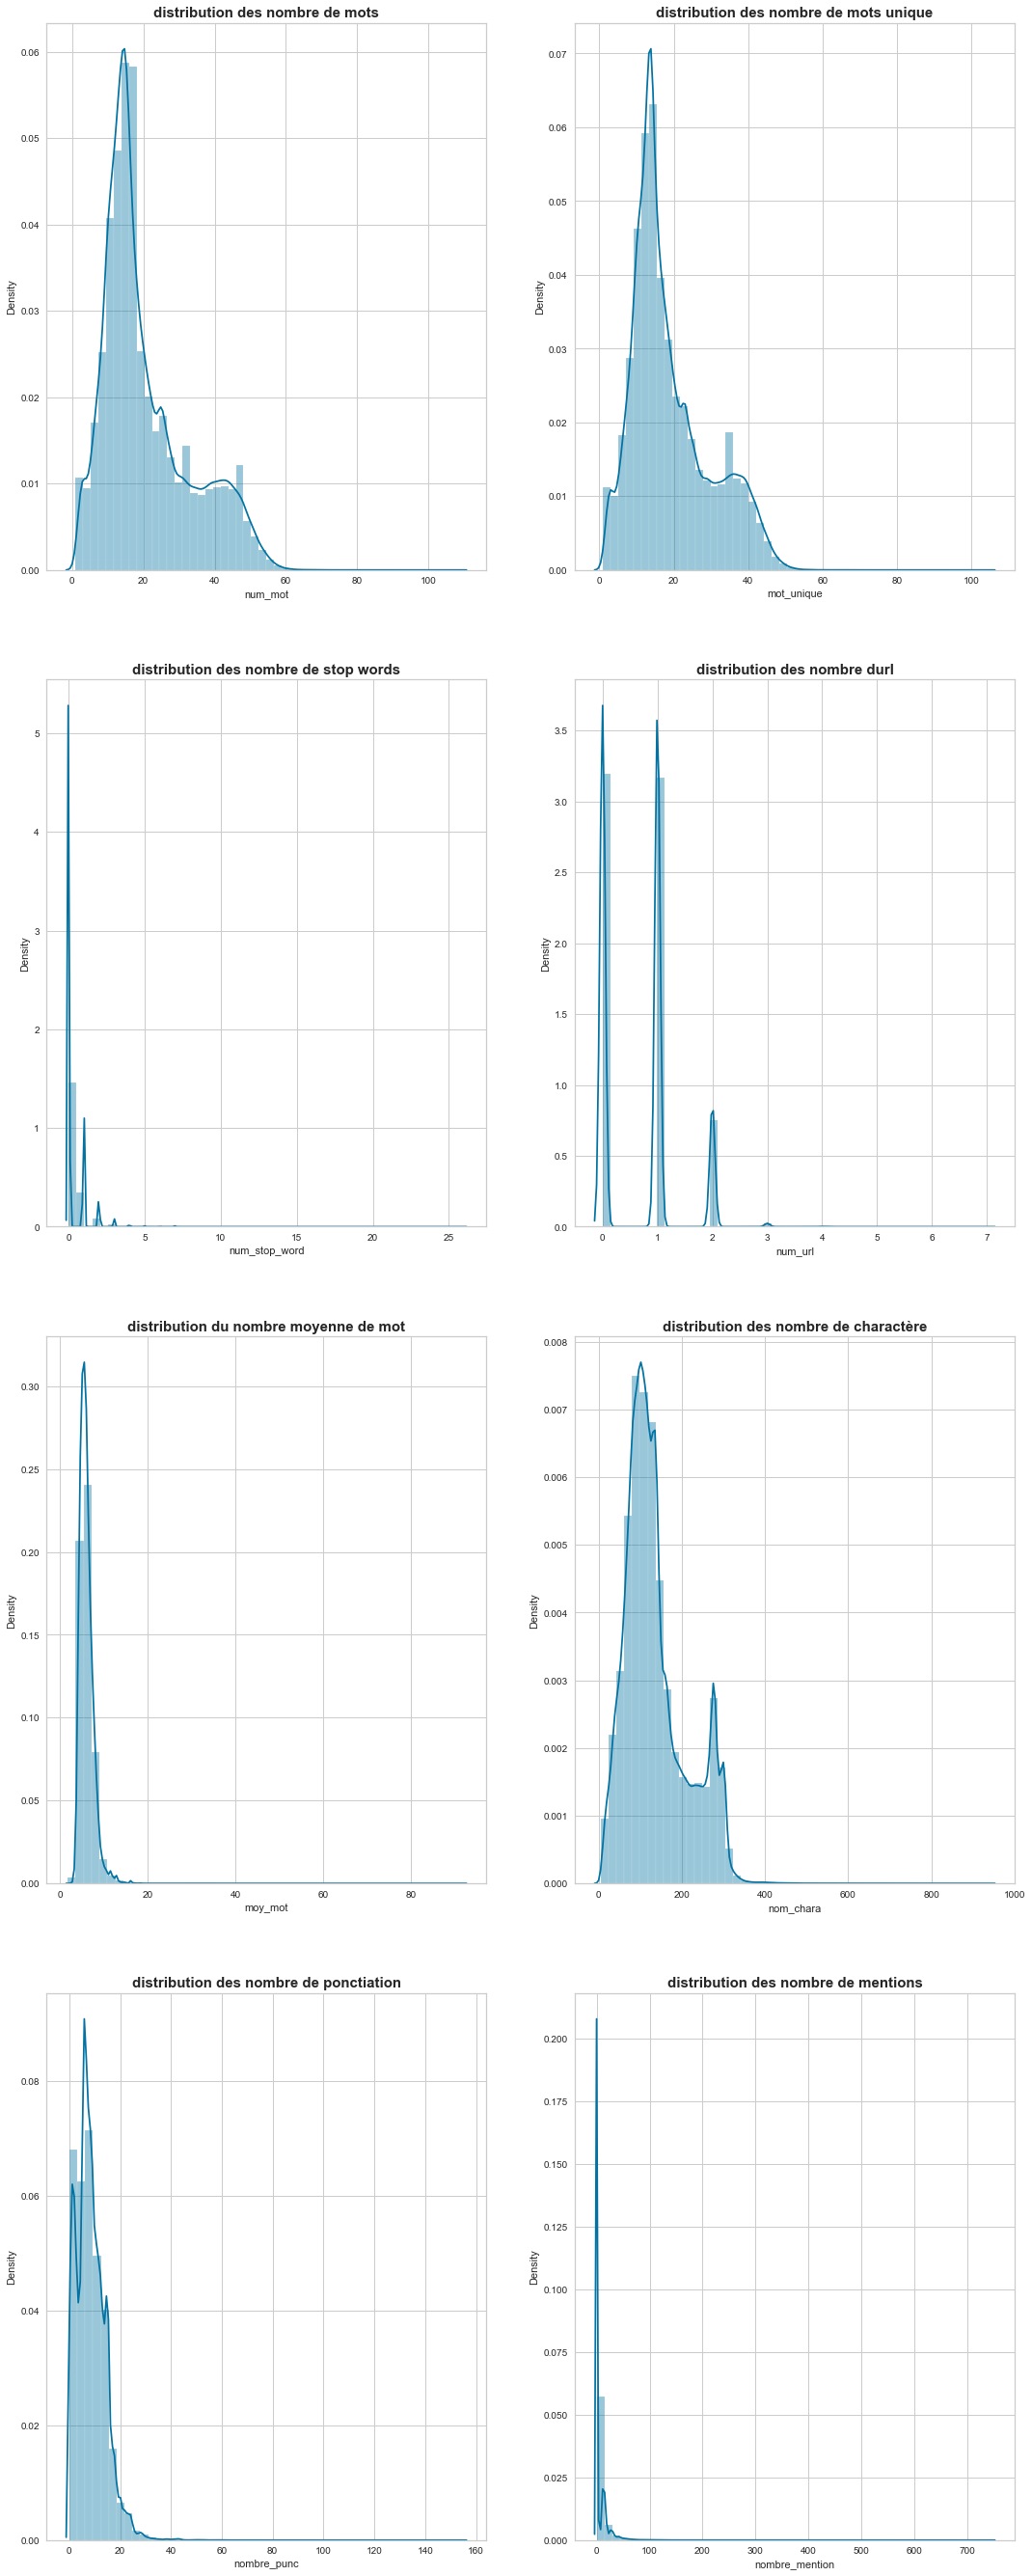

In [919]:
#après la création des feature, on essaie de les visualiser

fig,ax=plt.subplots(ncols=2,nrows=4,figsize=(18,48))

sns.distplot(data['num_mot'],ax=ax[0][0]).set_title(label='distribution des nombre de mots',fontsize=15,fontweight='bold')
sns.distplot(data['mot_unique'],ax=ax[0][1]).set_title(label='distribution des nombre de mots unique',fontsize=15,fontweight='bold')
sns.distplot(data['num_stop_word'],ax=ax[1][0]).set_title(label='distribution des nombre de stop words',fontsize=15,fontweight='bold')
sns.distplot(data['num_url'],ax=ax[1][1]).set_title(label='distribution des nombre d''url',fontsize=15,fontweight='bold')
sns.distplot(data['moy_mot'],ax=ax[2][0]).set_title(label='distribution du nombre moyenne de mot',fontsize=15,fontweight='bold')
sns.distplot(data['nom_chara'],ax=ax[2][1]).set_title(label='distribution des nombre de charactère',fontsize=15,fontweight='bold')
sns.distplot(data['nombre_punc'],ax=ax[3][0]).set_title(label='distribution des nombre de ponctiation',fontsize=15,fontweight='bold')
sns.distplot(data['nombre_mention'],ax=ax[3][1]).set_title(label='distribution des nombre de mentions',fontsize=15,fontweight='bold')
#sns.distplot(data['Non Alphanumeric'],ax=ax[3][1]).set_title(label='distribution des nombre des valeurs numériques',fontsize=15,fontweight='bold')



plt.show()

### Zoom sur les données labelisés par le centre de recherche

In [921]:
data_label=data[data['id_evt']>0]
data_label.reset_index(inplace=True)
data_label=data_label[['tweet_text','tweets_clean','id_evt','num_mot','mot_unique','num_stop_word','num_url','moy_mot','nom_chara','nombre_punc','nombre_mention','num_point_exclamation','num_point_interrogation','Non Alphanumeric']]
data_label.head(2)

tweet_text  \
0  Tremblement de terre M4.3 - 171km W of Port Ha...   
1  Tremblement de terre M3.5 - Near North Coast o...   

                                        tweets_clean  id_evt  num_mot  \
0  Tremblement de terre M4.3 - 171km W of Port Ha...   254.0       36   
1  Tremblement de terre M3.5 - Near North Coast o...   254.0       37   

   mot_unique  num_stop_word  num_url   moy_mot  nom_chara  nombre_punc  \
0          32              2        2  5.361111        228           28   
1          34              2        2  5.513514        240           29   

   nombre_mention  num_point_exclamation  num_point_interrogation  \
0               0                      0                        0   
1               0                      0                        0   

   Non Alphanumeric  
0                31  
1                32

In [922]:
data_label.describe()

id_evt       num_mot    mot_unique  num_stop_word       num_url  \
count  69995.000000  69995.000000  69995.000000   69995.000000  69995.000000   
mean     264.203672     19.231717     17.881363       0.359369      0.489335   
std       46.944447     11.666066     10.061058       0.722610      0.647559   
min      153.000000      1.000000      1.000000       0.000000      0.000000   
25%      227.000000     11.000000     11.000000       0.000000      0.000000   
50%      249.000000     16.000000     15.000000       0.000000      0.000000   
75%      312.000000     25.000000     23.000000       1.000000      1.000000   
max      386.000000     91.000000     86.000000      26.000000      6.000000   

            moy_mot     nom_chara   nombre_punc  nombre_mention  \
count  69995.000000  69995.000000  69995.000000    69995.000000   
mean       5.537779    121.400486      6.625388        5.221059   
std        1.400458     71.831124      5.632879       14.256061   
min        2.166667      6.000000      0.000000        0.000000   
25%        4.560000     70.000000      2.000000        0.000000   
50%        5.333333    105.000000      6.000000        0.000000   
75%        6.241379    154.000000     10.000000       10.000000   
max       92.333333    879.000000     89.000000      704.000000   

       num_point_exclamation  num_point_interrogation  Non Alphanumeric  
count           69995.000000             69995.000000      69995.000000  
mean                0.137867                 0.191714         10.870562  
std                 0.628921                 0.708493          7.975393  
min                 0.000000                 0.000000          0.000000  
25%                 0.000000                 0.000000          5.000000  
50%                 0.000000                 0.000000         10.000000  
75%                 0.000000                 0.000000         15.000000  
max                30.000000                19.000000         95.000000

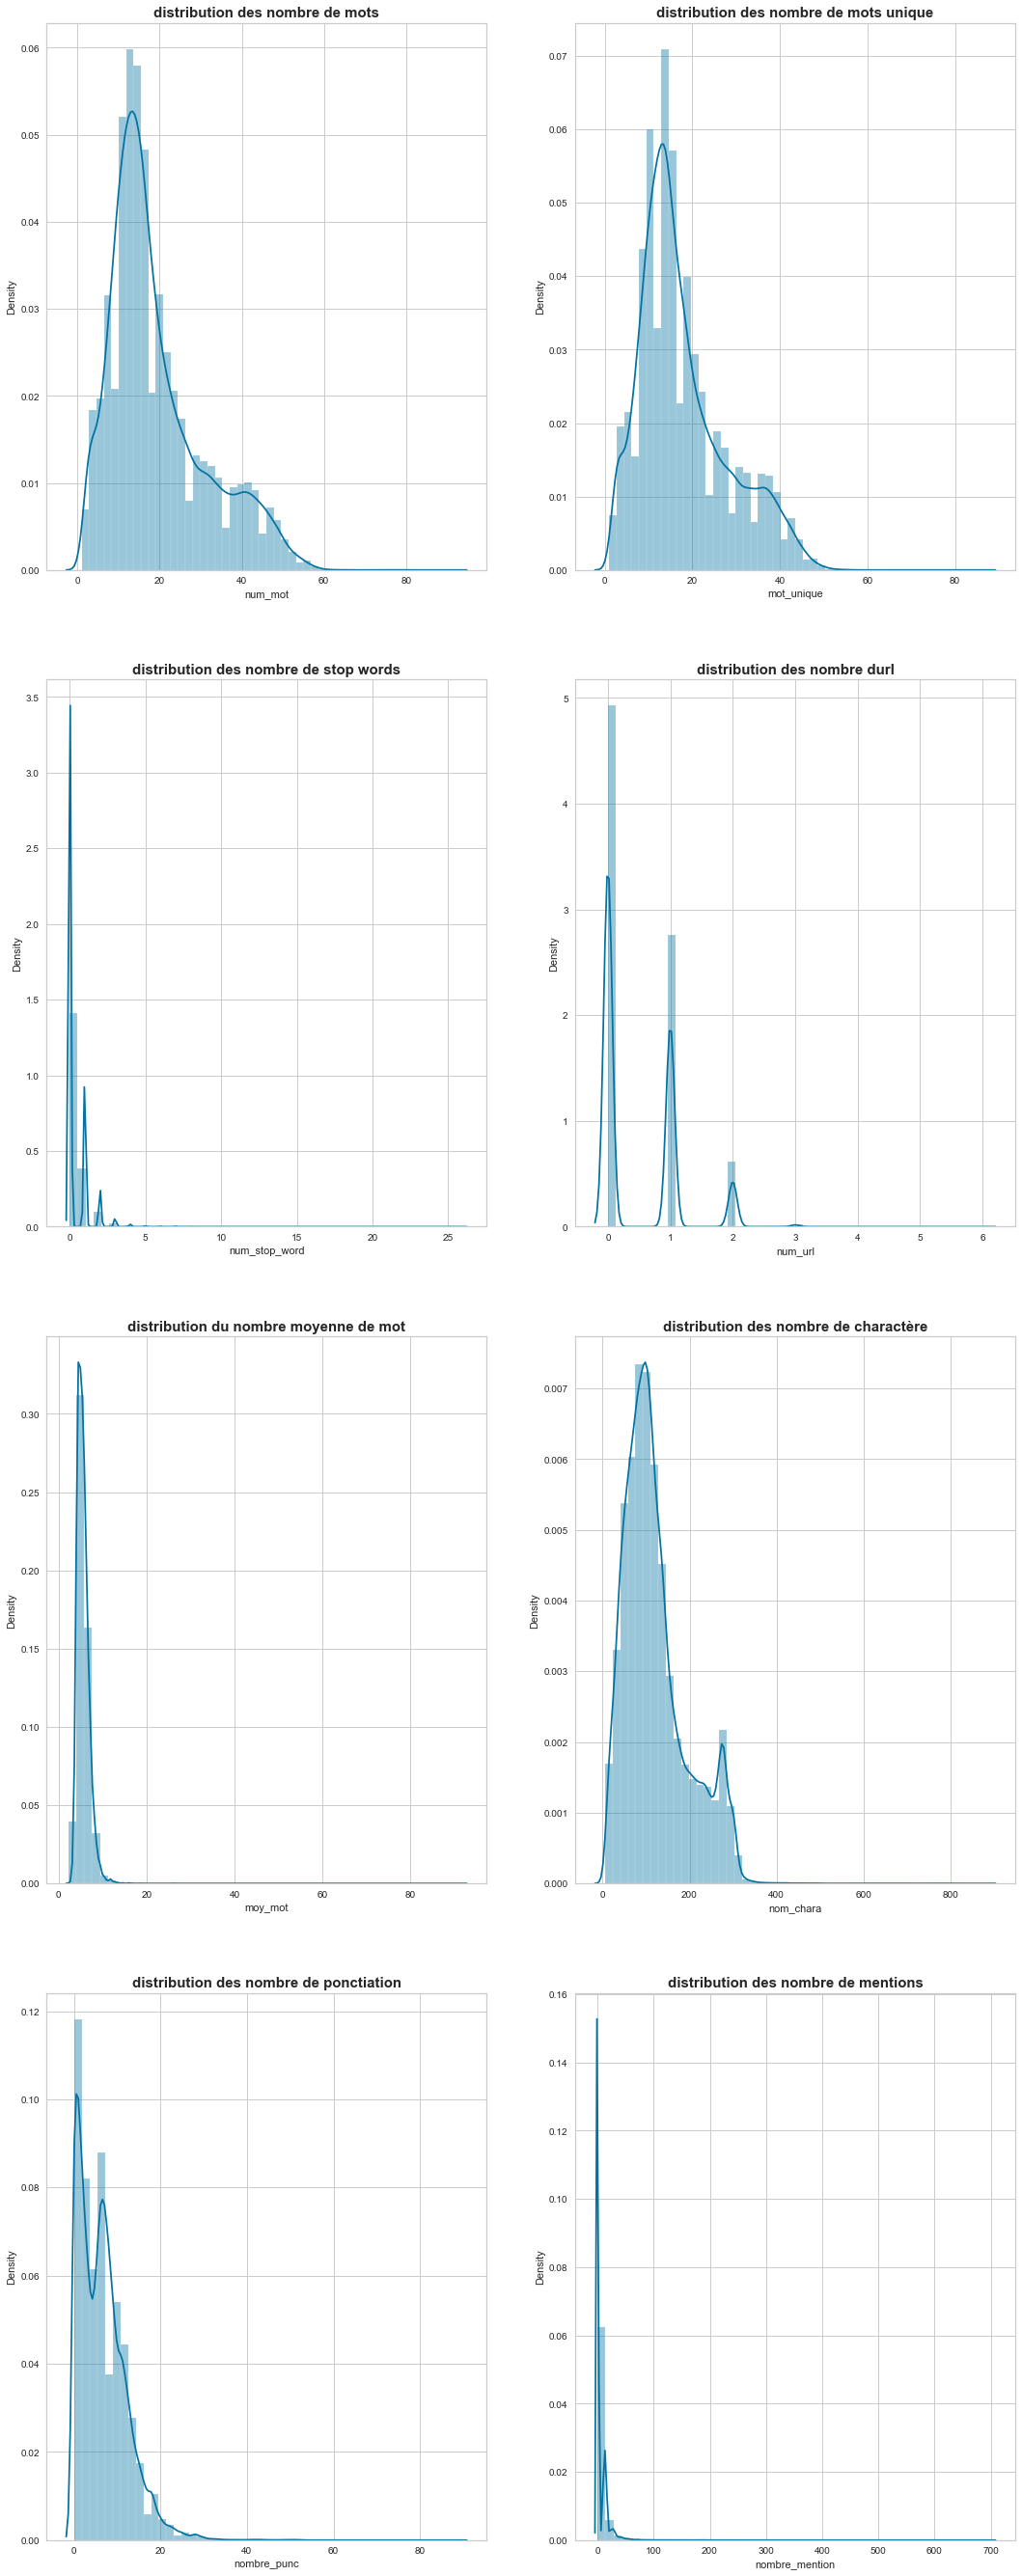

In [923]:
def plot_feature(df):
    
    fig,ax=plt.subplots(ncols=2,nrows=4,figsize=(18,48))

    sns.distplot(df['num_mot'],ax=ax[0][0]).set_title(label='distribution des nombre de mots',fontsize=15,fontweight='bold')
    sns.distplot(df['mot_unique'],ax=ax[0][1]).set_title(label='distribution des nombre de mots unique',fontsize=15,fontweight='bold')
    sns.distplot(df['num_stop_word'],ax=ax[1][0]).set_title(label='distribution des nombre de stop words',fontsize=15,fontweight='bold')
    sns.distplot(df['num_url'],ax=ax[1][1]).set_title(label='distribution des nombre d''url',fontsize=15,fontweight='bold')
    sns.distplot(df['moy_mot'],ax=ax[2][0]).set_title(label='distribution du nombre moyenne de mot',fontsize=15,fontweight='bold')
    sns.distplot(df['nom_chara'],ax=ax[2][1]).set_title(label='distribution des nombre de charactère',fontsize=15,fontweight='bold')
    sns.distplot(df['nombre_punc'],ax=ax[3][0]).set_title(label='distribution des nombre de ponctiation',fontsize=15,fontweight='bold')
    sns.distplot(df['nombre_mention'],ax=ax[3][1]).set_title(label='distribution des nombre de mentions',fontsize=15,fontweight='bold')

    plt.show()

plot_feature(data_label)

### tokenize du text des données labelisées

In [924]:
tokens=[]

for t in data_label['tweets_clean']:
    
    word_tokens=[]
    
    for w in re.sub('\W'," ",t).split():
        
        word_tokens.append(w)
    tokens.append(word_tokens)
    
data_label['word_tokens']=tokens

<>:7: DeprecationWarning:

invalid escape sequence \W

<>:7: DeprecationWarning:

invalid escape sequence \W

C:\Users\adminn\AppData\Local\Temp/ipykernel_22264/539833629.py:7: DeprecationWarning:

invalid escape sequence \W



In [925]:
data_label.head(5)

tweet_text  \
0  Tremblement de terre M4.3 - 171km W of Port Ha...   
1  Tremblement de terre M3.5 - Near North Coast o...   
2  Tremblement de terre M3.3 - Java, Indonesia - ...   
3  Tremblement de terre M4.4 - Irian Jaya, Indone...   
4  Tremblement de terre M4.9 - South Of Java, Ind...   

                                        tweets_clean  id_evt  num_mot  \
0  Tremblement de terre M4.3 - 171km W of Port Ha...   254.0       36   
1  Tremblement de terre M3.5 - Near North Coast o...   254.0       37   
2  Tremblement de terre M3.3 - Java, Indonesia - ...   254.0       32   
3  Tremblement de terre M4.4 - Irian Jaya, Indone...   254.0       33   
4  Tremblement de terre M4.9 - South Of Java, Ind...   254.0       34   

   mot_unique  num_stop_word  num_url   moy_mot  nom_chara  nombre_punc  \
0          32              2        2  5.361111        228           28   
1          34              2        2  5.513514        240           29   
2          29              1        2  5.718750        214           28   
3          30              1        2  5.696970        220           28   
4          31              2        2  5.588235        223           28   

   nombre_mention  num_point_exclamation  num_point_interrogation  \
0               0                      0                        0   
1               0                      0                        0   
2               0                      0                        0   
3               0                      0                        0   
4               0                      0                        0   

   Non Alphanumeric                                        word_tokens  
0                31  [Tremblement, de, terre, M4, 3, 171km, W, of, ...  
1                32  [Tremblement, de, terre, M3, 5, Near, North, C...  
2                31  [Tremblement, de, terre, M3, 3, Java, Indonesi...  
3                31  [Tremblement, de, terre, M4, 4, Irian, Jaya, I...  
4                31  [Tremblement, de, terre, M4, 9, South, Of, Jav...

In [926]:
# remove stop words

tokens=[]

for t in data_label['tweets_clean']:
    
    word_tokens=[]
    
    for w in re.sub('\W'," ",t).split():
        
        word_tokens.append(w)
    tokens.append(word_tokens)
    
data_label['word_tokens']=tokens

filtred_words=[]

for c in data_label['word_tokens']:
    
    filterd=[w for w in c if not w in stop_word]
    
    filtred_words.append(' '.join(filterd))
data_label['text_after_preprocess']=filtred_words



In [927]:
data_label['text_after_preprocess']=filtred_words
data_label.head(5)

tweet_text  \
0  Tremblement de terre M4.3 - 171km W of Port Ha...   
1  Tremblement de terre M3.5 - Near North Coast o...   
2  Tremblement de terre M3.3 - Java, Indonesia - ...   
3  Tremblement de terre M4.4 - Irian Jaya, Indone...   
4  Tremblement de terre M4.9 - South Of Java, Ind...   

                                        tweets_clean  id_evt  num_mot  \
0  Tremblement de terre M4.3 - 171km W of Port Ha...   254.0       36   
1  Tremblement de terre M3.5 - Near North Coast o...   254.0       37   
2  Tremblement de terre M3.3 - Java, Indonesia - ...   254.0       32   
3  Tremblement de terre M4.4 - Irian Jaya, Indone...   254.0       33   
4  Tremblement de terre M4.9 - South Of Java, Ind...   254.0       34   

   mot_unique  num_stop_word  num_url   moy_mot  nom_chara  nombre_punc  \
0          32              2        2  5.361111        228           28   
1          34              2        2  5.513514        240           29   
2          29              1        2  5.718750        214           28   
3          30              1        2  5.696970        220           28   
4          31              2        2  5.588235        223           28   

   nombre_mention  num_point_exclamation  num_point_interrogation  \
0               0                      0                        0   
1               0                      0                        0   
2               0                      0                        0   
3               0                      0                        0   
4               0                      0                        0   

   Non Alphanumeric                                        word_tokens  \
0                31  [Tremblement, de, terre, M4, 3, 171km, W, of, ...   
1                32  [Tremblement, de, terre, M3, 5, Near, North, C...   
2                31  [Tremblement, de, terre, M3, 3, Java, Indonesi...   
3                31  [Tremblement, de, terre, M4, 4, Irian, Jaya, I...   
4                31  [Tremblement, de, terre, M4, 9, South, Of, Jav...   

                               text_after_preprocess  
0  Tremblement terre M4 3 171km W Port Hardy Cana...  
1  Tremblement terre M3 5 Near North Coast Irian ...  
2  Tremblement terre M3 3 Java Indonesia sam 3 ao...  
3  Tremblement terre M4 4 Irian Jaya Indonesia sa...  
4  Tremblement terre M4 9 South Of Java Indonesia...

## Analyse de sentiment sur les données labelisés

### description de l'analyse par sentiment

- blablablablablablabalabla

In [974]:
data_label['text_after_preprocess'] = data_label['text_after_preprocess'].str.replace('\d+', '')
#supress

<>:1: DeprecationWarning:

invalid escape sequence \d

<>:1: DeprecationWarning:

invalid escape sequence \d

C:\Users\adminn\AppData\Local\Temp/ipykernel_22264/3202456872.py:1: DeprecationWarning:

invalid escape sequence \d



In [1051]:
sentiment_list=[]

for i in data_label['text_after_preprocess']:
    
    vs=tb(i).sentiment[0]
    
    if vs>0.5:
        sentiment_list.append('Positive')
    elif vs<0.4:
        sentiment_list.append('Negatif')
        
    else:
        sentiment_list.append('Neutre')
        
data_label['sentiment']=sentiment_list

In [1052]:
import plotly.express as px
fig=px.histogram(data_label,x='sentiment',color='sentiment')
fig.show()

In [977]:
data_label.describe()

id_evt       num_mot    mot_unique  num_stop_word       num_url  \
count  69995.000000  69995.000000  69995.000000   69995.000000  69995.000000   
mean     264.203672     19.231717     17.881363       0.359369      0.489335   
std       46.944447     11.666066     10.061058       0.722610      0.647559   
min      153.000000      1.000000      1.000000       0.000000      0.000000   
25%      227.000000     11.000000     11.000000       0.000000      0.000000   
50%      249.000000     16.000000     15.000000       0.000000      0.000000   
75%      312.000000     25.000000     23.000000       1.000000      1.000000   
max      386.000000     91.000000     86.000000      26.000000      6.000000   

            moy_mot     nom_chara   nombre_punc  nombre_mention  \
count  69995.000000  69995.000000  69995.000000    69995.000000   
mean       5.537779    121.400486      6.625388        5.221059   
std        1.400458     71.831124      5.632879       14.256061   
min        2.166667      6.000000      0.000000        0.000000   
25%        4.560000     70.000000      2.000000        0.000000   
50%        5.333333    105.000000      6.000000        0.000000   
75%        6.241379    154.000000     10.000000       10.000000   
max       92.333333    879.000000     89.000000      704.000000   

       num_point_exclamation  num_point_interrogation  Non Alphanumeric  
count           69995.000000             69995.000000      69995.000000  
mean                0.137867                 0.191714         10.870562  
std                 0.628921                 0.708493          7.975393  
min                 0.000000                 0.000000          0.000000  
25%                 0.000000                 0.000000          5.000000  
50%                 0.000000                 0.000000         10.000000  
75%                 0.000000                 0.000000         15.000000  
max                30.000000                19.000000         95.000000

## Analyse de mot sur les données positives.

In [978]:
positive_data=data_label[data_label['sentiment']=='Positive']
i=positive_data.sample(1).index[0]

print('texte réel : {}'.format(positive_data['tweet_text'][i]))

print('----------------')

print('text modifie : {}'.format(positive_data['tweets_clean'][i]))

texte réel : — Poséidon. 
— Alexander Hansen. 
— Dieu de la mer et des océans, des tremblements de terre. 
— Cétologue. 
— Intelligent, têtu, colérique. 

@_Poséidon_Alex https://t.co/CdT3MoSB8L
----------------
text modifie : — Poséidon. 
— Alexander Hansen. 
— Dieu de la mer et des océans, des tremblements de terre. 
— Cétologue. 
— Intelligent, têtu, colérique. 

@_Poséidon_Alex 


In [979]:
positive_data.describe()

id_evt    num_mot  mot_unique  num_stop_word    num_url    moy_mot  \
count   67.000000  67.000000   67.000000      67.000000  67.000000  67.000000   
mean   252.522388  19.014925   17.656716       0.253731   0.119403   5.220925   
std     36.511666  10.609448    9.169370       0.532099   0.326709   1.128956   
min    159.000000   3.000000    3.000000       0.000000   0.000000   3.333333   
25%    227.000000  11.500000   11.500000       0.000000   0.000000   4.500000   
50%    237.000000  16.000000   15.000000       0.000000   0.000000   5.076923   
75%    271.500000  24.500000   21.500000       0.000000   0.000000   5.645768   
max    359.000000  46.000000   42.000000       2.000000   1.000000  10.666667   

        nom_chara  nombre_punc  nombre_mention  num_point_exclamation  \
count   67.000000    67.000000       67.000000              67.000000   
mean   114.402985     4.358209        5.462687               0.223881   
std     63.340843     4.604680       10.744031               0.572631   
min     32.000000     0.000000        0.000000               0.000000   
25%     71.500000     1.000000        0.000000               0.000000   
50%     93.000000     3.000000        0.000000               0.000000   
75%    142.500000     7.000000       10.000000               0.000000   
max    281.000000    17.000000       54.000000               3.000000   

       num_point_interrogation  Non Alphanumeric  
count                67.000000         67.000000  
mean                  0.208955          9.925373  
std                   0.807865          9.069285  
min                   0.000000          1.000000  
25%                   0.000000          4.500000  
50%                   0.000000          7.000000  
75%                   0.000000         11.000000  
max                   6.000000         46.000000

In [980]:
positive_data.head(2)

tweet_text  \
2645  @nedroma11 Magnifique mais en cas de trembleme...   
3586  @BFMTV Très beau pays le #Japon , après les tr...   

                                           tweets_clean  id_evt  num_mot  \
2645   Magnifique mais en cas de tremblement de terr...   359.0       14   
3586   Très beau pays le Japon , après les trembleme...   227.0       22   

      mot_unique  num_stop_word  num_url   moy_mot  nom_chara  nombre_punc  \
2645          13              0        0  4.571429         77            2   
3586          19              0        0  4.727273        125            8   

      nombre_mention  num_point_exclamation  num_point_interrogation  \
2645              12                      0                        1   
3586               8                      0                        0   

      Non Alphanumeric                                        word_tokens  \
2645                 3  [Magnifique, mais, en, cas, de, tremblement, d...   
3586                10  [Très, beau, pays, le, Japon, après, les, trem...   

                                  text_after_preprocess sentiment  
2645     Magnifique cas tremblement terre ça craint Lol  Positive  
3586  Très beau pays Japon après tremblements terre ...  Positive

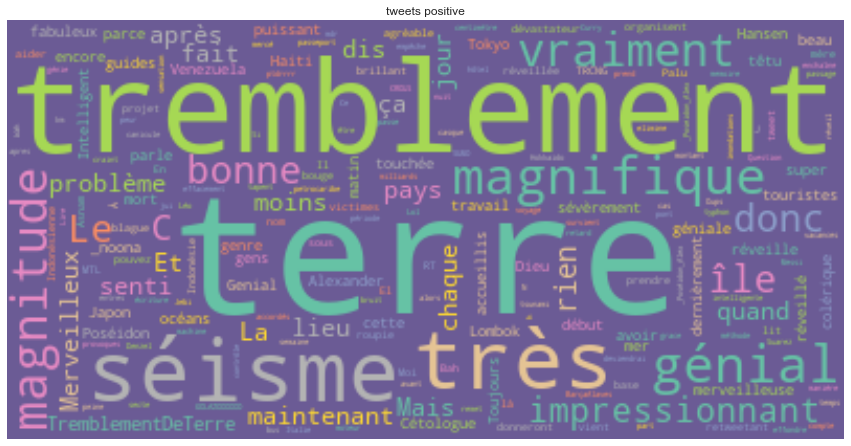

In [981]:
positive_text=" ".join(i for i in positive_data.text_after_preprocess)

wordcloud=WordCloud(background_color="#6B5B95",
                   colormap="Set2",
                   collocations=False).generate(positive_text)

plt.figure(figsize=(15,12))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.title('tweets positive')
plt.show()

## Analyse de mot sur les données neutres.

In [982]:
Neutral_data=data_label[data_label['sentiment']=='Neutre']
i=Neutral_data.sample(1).index[0]

print('texte réel : {}'.format(Neutral_data['tweet_text'][i]))

print('----------------')

print('text modifie : {}'.format(Neutral_data['tweets_clean'][i]))

texte réel : tremblement de terre sur Genève incroyable
----------------
text modifie : tremblement de terre sur Genève incroyable


In [983]:
Neutral_data.describe()

id_evt      num_mot   mot_unique  num_stop_word      num_url  \
count  1398.000000  1398.000000  1398.000000    1398.000000  1398.000000   
mean    263.641631    18.273963    17.137339       0.371245     0.520029   
std      46.231417     9.691596     8.240811       0.766292     0.653682   
min     153.000000     2.000000     2.000000       0.000000     0.000000   
25%     227.000000    12.000000    12.000000       0.000000     0.000000   
50%     249.000000    16.000000    15.000000       0.000000     0.000000   
75%     312.000000    21.000000    20.000000       1.000000     1.000000   
max     383.000000    91.000000    86.000000       7.000000     3.000000   

           moy_mot    nom_chara  nombre_punc  nombre_mention  \
count  1398.000000  1398.000000  1398.000000     1398.000000   
mean      5.522290   115.218169     6.216738        4.640200   
std       1.263811    59.796795     5.114811       19.827532   
min       3.057692    17.000000     0.000000        0.000000   
25%       4.545455    77.250000     2.000000        0.000000   
50%       5.317627   102.000000     6.000000        0.000000   
75%       6.285714   136.000000     9.000000        0.000000   
max      13.600000   879.000000    65.000000      647.000000   

       num_point_exclamation  num_point_interrogation  Non Alphanumeric  
count            1398.000000              1398.000000       1398.000000  
mean                0.155222                 0.111588         10.180258  
std                 0.559500                 0.562864          7.051938  
min                 0.000000                 0.000000          0.000000  
25%                 0.000000                 0.000000          5.000000  
50%                 0.000000                 0.000000          9.000000  
75%                 0.000000                 0.000000         14.000000  
max                 8.000000                12.000000         68.000000

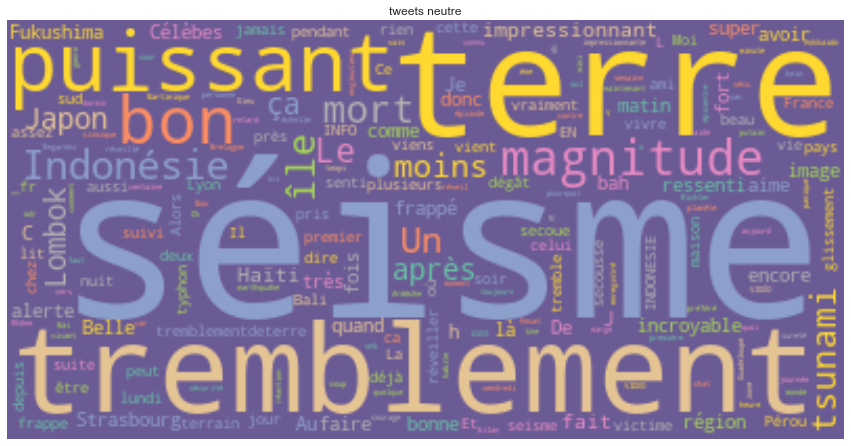

In [984]:

neutral_text=" ".join(i for i in Neutral_data.text_after_preprocess)

wordcloud=WordCloud(background_color="#6B5B95",
                   colormap="Set2",
                   collocations=False).generate(neutral_text)

plt.figure(figsize=(15,12))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.title('tweets neutre')
plt.show()

In [986]:
Negatif_data=data_label[data_label['sentiment']=='Negatif']
i=Negatif_data.sample(1).index[0]

print('texte réel : {}'.format(Negatif_data['tweet_text'][i]))

print('----------------')

print('text modifie : {}'.format(Negatif_data['tweets_clean'][i]))

texte réel : Alerte #PointBobo magnitude 7
----------------
text modifie : Alerte PointBobo magnitude 7


In [987]:
Negatif_data.describe()

id_evt       num_mot    mot_unique  num_stop_word       num_url  \
count  68530.000000  68530.000000  68530.000000   68530.000000  68530.000000   
mean     264.226558     19.251467     17.896761       0.359230      0.489070   
std       46.966988     11.703173     10.095142       0.721853      0.647557   
min      153.000000      1.000000      1.000000       0.000000      0.000000   
25%      227.000000     11.000000     11.000000       0.000000      0.000000   
50%      249.000000     16.000000     15.000000       0.000000      0.000000   
75%      312.000000     25.000000     23.000000       1.000000      1.000000   
max      386.000000     78.000000     75.000000      26.000000      6.000000   

            moy_mot     nom_chara   nombre_punc  nombre_mention  \
count  68530.000000  68530.000000  68530.000000    68530.000000   
mean       5.538405    121.533445      6.635940        5.232672   
std        1.403324     72.058398      5.643169       14.122591   
min        2.166667      6.000000      0.000000        0.000000   
25%        4.560976     70.000000      2.000000        0.000000   
50%        5.333333    105.000000      6.000000        0.000000   
75%        6.241379    155.000000     10.000000       10.000000   
max       92.333333    806.000000     89.000000      704.000000   

       num_point_exclamation  num_point_interrogation  Non Alphanumeric  
count           68530.000000             68530.000000      68530.000000  
mean                0.137429                 0.193331         10.885568  
std                 0.630307                 0.710966          7.991425  
min                 0.000000                 0.000000          0.000000  
25%                 0.000000                 0.000000          5.000000  
50%                 0.000000                 0.000000         10.000000  
75%                 0.000000                 0.000000         15.000000  
max                30.000000                19.000000         95.000000

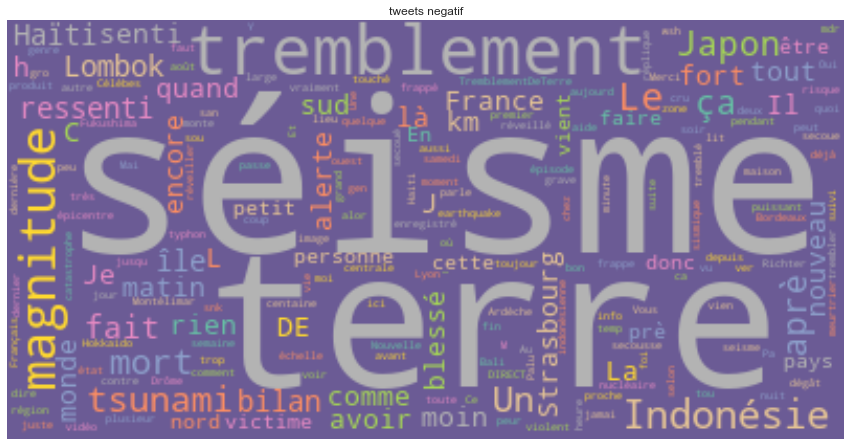

In [988]:
negatif_text=" ".join(i for i in Negatif_data.text_after_preprocess)

wordcloud=WordCloud(background_color="#6B5B95",
                   colormap="Set2",
                   collocations=False).generate(negatif_text)

plt.figure(figsize=(15,12))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.title('tweets negatif')
plt.show()

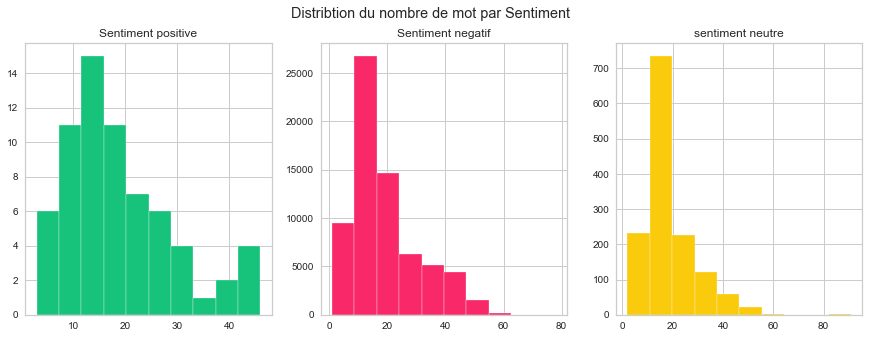

In [989]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

ax1.hist(positive_data['num_mot'],color="#17C37B")
ax1.set_title('Sentiment positive')

ax2.hist(Negatif_data['num_mot'],color='#F92969')
ax2.set_title('Sentiment negatif')

ax3.hist(Neutral_data['num_mot'],color='#FACA0C')
ax3.set_title('sentiment neutre')

fig.suptitle('Distribtion du nombre de mot par Sentiment')
plt.show()

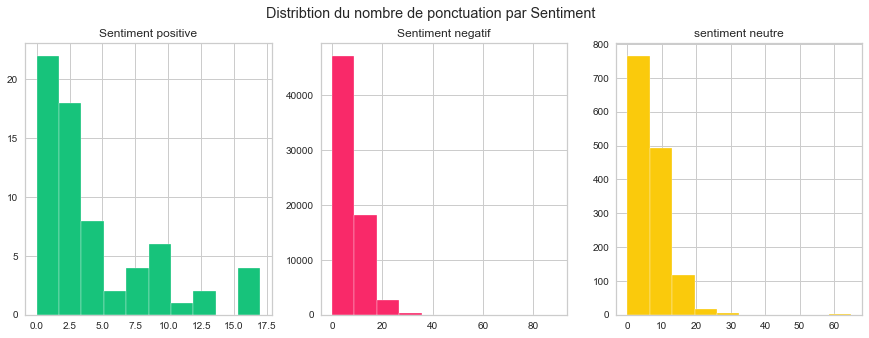

In [990]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

ax1.hist(positive_data['nombre_punc'],color="#17C37B")
ax1.set_title('Sentiment positive')

ax2.hist(Negatif_data['nombre_punc'],color='#F92969')
ax2.set_title('Sentiment negatif')

ax3.hist(Neutral_data['nombre_punc'],color='#FACA0C')
ax3.set_title('sentiment neutre')

fig.suptitle('Distribtion du nombre de ponctuation par Sentiment')
plt.show()

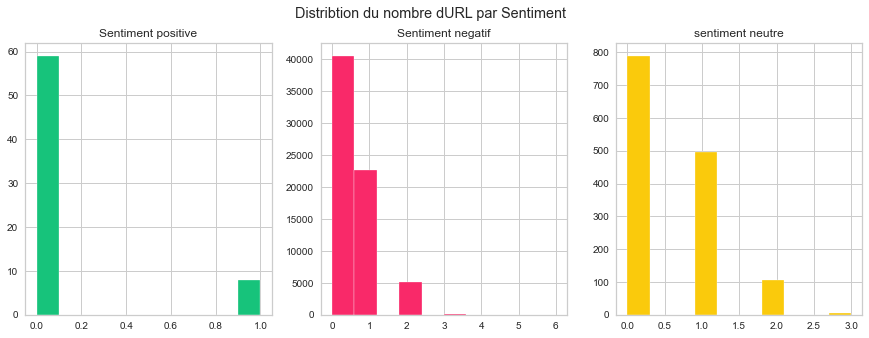

In [991]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

ax1.hist(positive_data['num_url'],color="#17C37B")
ax1.set_title('Sentiment positive')

ax2.hist(Negatif_data['num_url'],color='#F92969')
ax2.set_title('Sentiment negatif')

ax3.hist(Neutral_data['num_url'],color='#FACA0C')
ax3.set_title('sentiment neutre')

fig.suptitle('Distribtion du nombre d''URL par Sentiment')
plt.show()

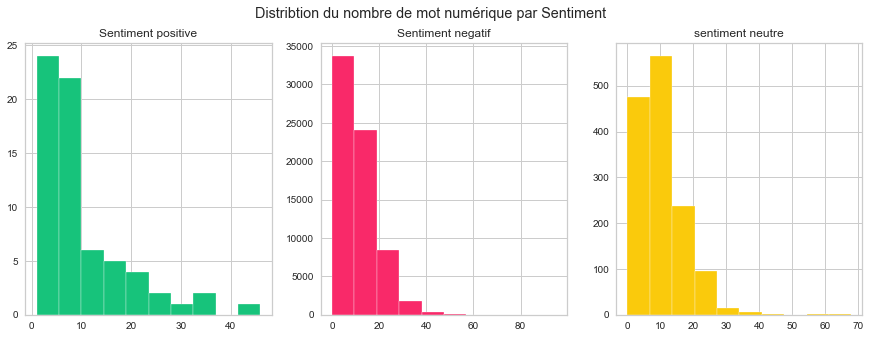

In [992]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

ax1.hist(positive_data['Non Alphanumeric'],color="#17C37B")
ax1.set_title('Sentiment positive')

ax2.hist(Negatif_data['Non Alphanumeric'],color='#F92969')
ax2.set_title('Sentiment negatif')

ax3.hist(Neutral_data['Non Alphanumeric'],color='#FACA0C')
ax3.set_title('sentiment neutre')

fig.suptitle('Distribtion du nombre de mot numérique par Sentiment')
plt.show()

### visualisation des mots les plus fréquentes par sentiment

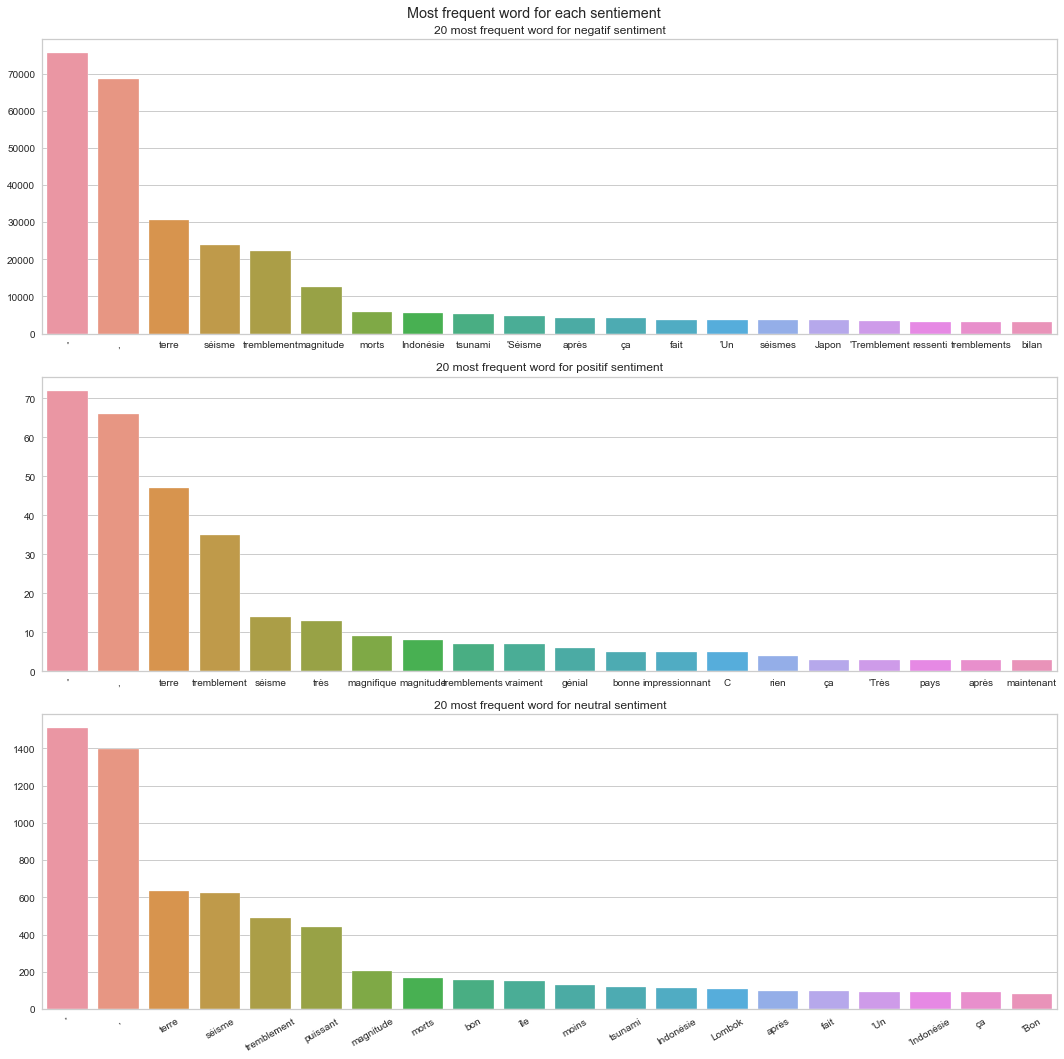

In [1002]:
# creating freqDistrubtion for neutral sentiment

word_neutral=[]

for w in Neutral_data['text_after_preprocess']:
    
    word_neutral.append(w)
    
tokens=nltk.word_tokenize(str(word_neutral))
    
frequence_dist=nltk.FreqDist(tokens).most_common(20)
frequence_dist_neutral=pd.Series(dict(frequence_dist))

# creating freqDistrubtion for positive sentiment


word_positif=[]

for w in positive_data['text_after_preprocess']:
    
    word_positif.append(w)
    
tokens=nltk.word_tokenize(str(word_positif))
    
frequence_dist_pos=nltk.FreqDist(tokens).most_common(20)
frequence_dist_pos=pd.Series(dict(frequence_dist_pos))


# creating freqDistrubtion for negatif sentiment
word_negatif=[]

for w in Negatif_data['text_after_preprocess']:
    
    word_negatif.append(w)
    
tokens=nltk.word_tokenize(str(word_negatif))
    
frequence_dist_neg=nltk.FreqDist(tokens).most_common(20)
frequence_dist_negatif=pd.Series(dict(frequence_dist_neg))


fig,(ax1,ax2,ax3)=plt.subplots(3,1,figsize=(15,15))

sns.barplot(x=frequence_dist_negatif.index,y=frequence_dist_negatif.values,ax=ax1)
ax1.set_title('20 most frequent word for negatif sentiment')
plt.xticks(rotation=45)

sns.barplot(x=frequence_dist_pos.index,y=frequence_dist_pos.values,ax=ax2)
ax2.set_title('20 most frequent word for positif sentiment')
plt.xticks(rotation=45)

sns.barplot(x=frequence_dist_neutral.index,y=frequence_dist_neutral.values,ax=ax3)
ax3.set_title('20 most frequent word for neutral sentiment')
plt.xticks(rotation=30)


fig.suptitle('Most frequent word for each sentiement')

plt.tight_layout()
plt.show()


### Remarque sur l'analyse des mots fréquents:
- on peut remarque la présence des mots comme Terre,lombok,un: c'est mot ne reflète pas une signification précise ainsi on préfère avoir une combinaison de mot par exemple savoir le nombre de fois où le mot **Tremblement de terre** se répète 

- Pour y parvenir on utilisera la méthode **N-gram**.

### N-gram

---

<center><img style="width: 700px;" src="https://images.deepai.org/glossary-terms/867de904ba9b46869af29cead3194b6c/8ARA1.png"></center>

---
<i>Source: Image from Google</i>

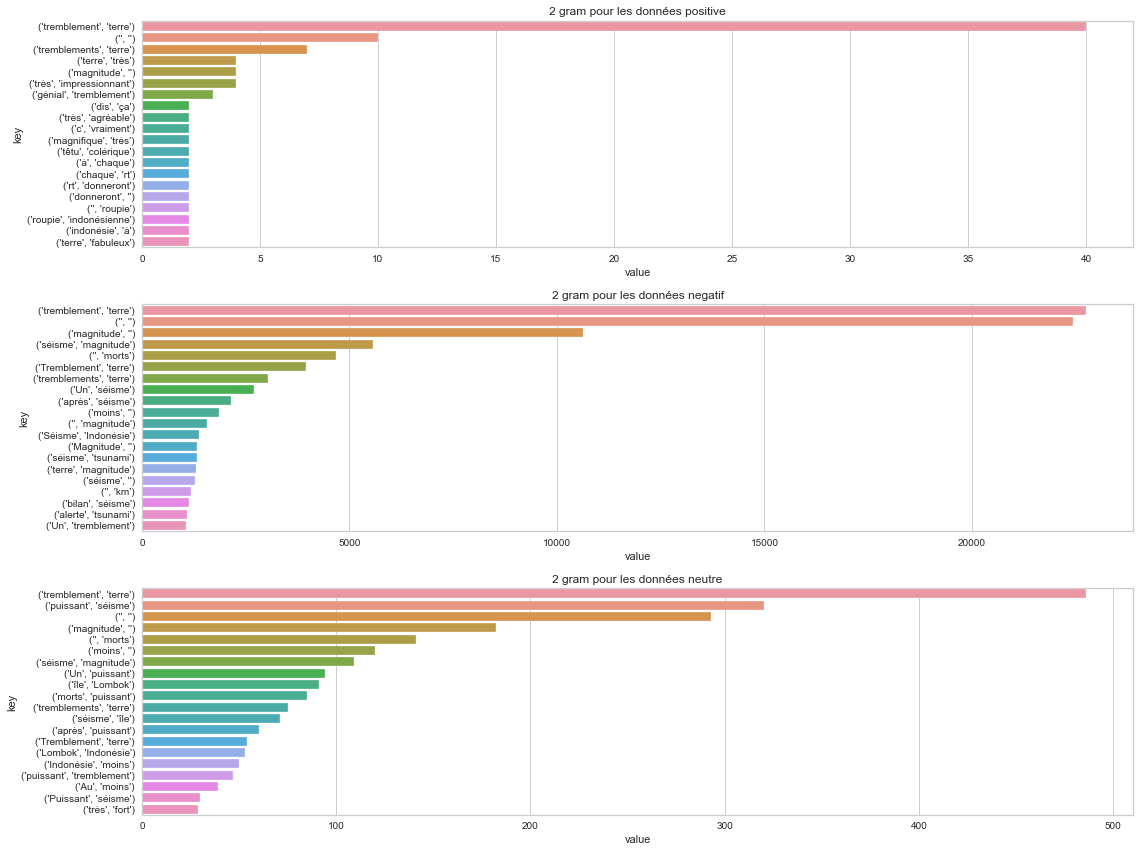

In [1013]:

#2 gram pour les postive
text_positive=' '.join(positive_data['text_after_preprocess'])
str_val_pos=text_positive.lower().split(" ")

data_unigram=(pd.Series(nltk.ngrams(str_val_pos, 2)).value_counts())[:20]

data_unigram_df_pos=pd.DataFrame(data_unigram)
data_unigram_df_pos= data_unigram_df_pos.reset_index()
data_unigram_df_pos= data_unigram_df_pos.rename(columns={"index": "key", 0: "value"})

#2 gram Negative data

text_neg=' '.join(Negatif_data['text_after_preprocess'])
str_val_neg=text_neg.split(" ")

data_unigram=(pd.Series(nltk.ngrams(str_val_neg, 2)).value_counts())[:20]

data_unigram_df_neg=pd.DataFrame(data_unigram)
data_unigram_df_neg= data_unigram_df_neg.reset_index()
data_unigram_df_neg= data_unigram_df_neg.rename(columns={"index": "key", 0: "value"})

#2 gram Neutral data

text_neu=' '.join(Neutral_data['text_after_preprocess'])
str_val_neu=text_neu.split(" ")

data_unigram_neu=(pd.Series(nltk.ngrams(str_val_neu, 2)).value_counts())[:20]

data_unigram_neu=pd.DataFrame(data_unigram_neu)
data_unigram_neu= data_unigram_neu.reset_index()
data_unigram_neu= data_unigram_neu.rename(columns={"index": "key", 0: "value"})



#visualisation

fig,(ax1,ax2,ax3)=plt.subplots(nrows=3,ncols=1,figsize = (16,12))

sns.barplot(x='value',y='key', data=data_unigram_df_pos,ax=ax1).set_title('2 gram pour les données positive')

sns.barplot(x='value',y='key', data=data_unigram_df_neg,ax=ax2).set_title('2 gram pour les données negatif')

sns.barplot(x='value',y='key', data=data_unigram_neu,ax=ax3).set_title('2 gram pour les données neutre')

fig.tight_layout()
plt.show()

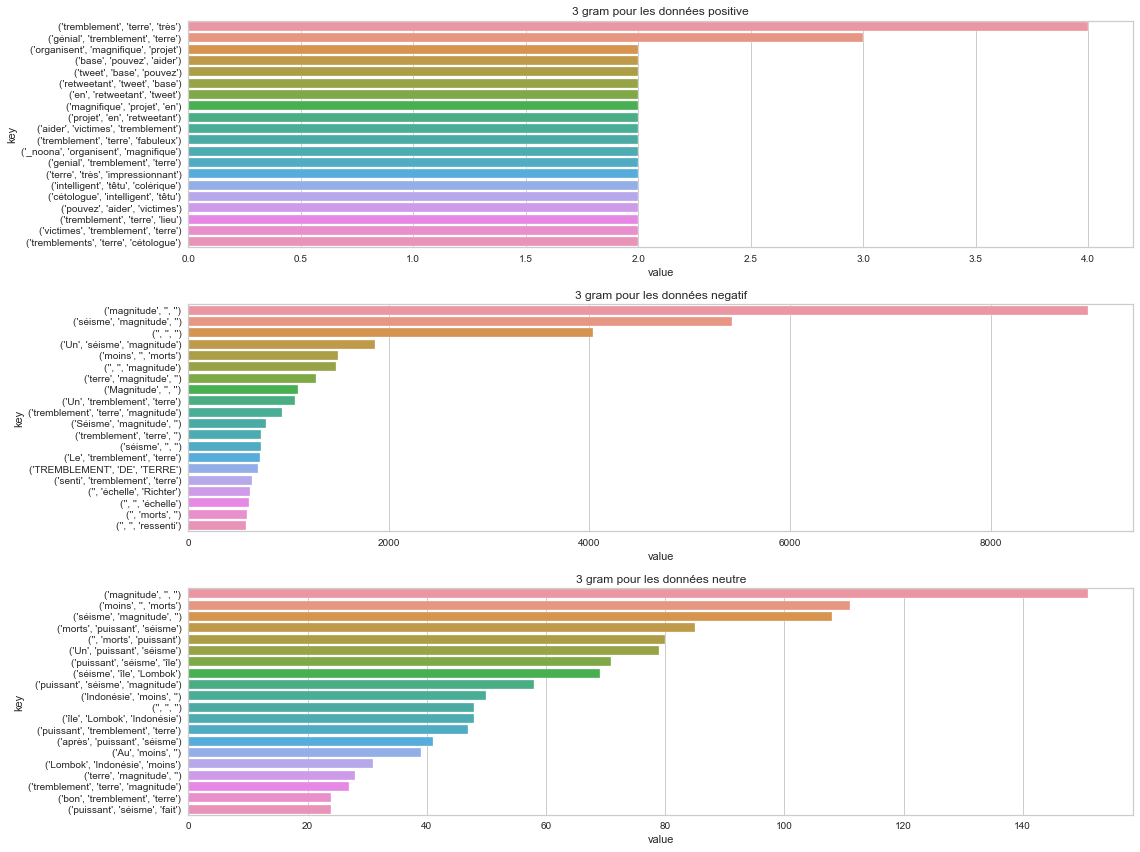

In [1015]:

#2 gram pour les postive
text_positive=' '.join(positive_data['text_after_preprocess'])
str_val_pos=text_positive.lower().split(" ")

data_unigram=(pd.Series(nltk.ngrams(str_val_pos, 3)).value_counts())[:20]

data_unigram_df_pos=pd.DataFrame(data_unigram)
data_unigram_df_pos= data_unigram_df_pos.reset_index()
data_unigram_df_pos= data_unigram_df_pos.rename(columns={"index": "key", 0: "value"})

#2 gram Negative data

text_neg=' '.join(Negatif_data['text_after_preprocess'])
str_val_neg=text_neg.split(" ")

data_unigram=(pd.Series(nltk.ngrams(str_val_neg, 3)).value_counts())[:20]

data_unigram_df_neg=pd.DataFrame(data_unigram)
data_unigram_df_neg= data_unigram_df_neg.reset_index()
data_unigram_df_neg= data_unigram_df_neg.rename(columns={"index": "key", 0: "value"})

#2 gram Neutral data

text_neu=' '.join(Neutral_data['text_after_preprocess'])
str_val_neu=text_neu.split(" ")

data_unigram_neu=(pd.Series(nltk.ngrams(str_val_neu, 3)).value_counts())[:20]

data_unigram_neu=pd.DataFrame(data_unigram_neu)
data_unigram_neu= data_unigram_neu.reset_index()
data_unigram_neu= data_unigram_neu.rename(columns={"index": "key", 0: "value"})



#visualisation

fig,(ax1,ax2,ax3)=plt.subplots(nrows=3,ncols=1,figsize = (16,12))

sns.barplot(x='value',y='key', data=data_unigram_df_pos,ax=ax1).set_title('3 gram pour les données positive')

sns.barplot(x='value',y='key', data=data_unigram_df_neg,ax=ax2).set_title('3 gram pour les données negatif')

sns.barplot(x='value',y='key', data=data_unigram_neu,ax=ax3).set_title('3 gram pour les données neutre')

fig.tight_layout()
plt.show()

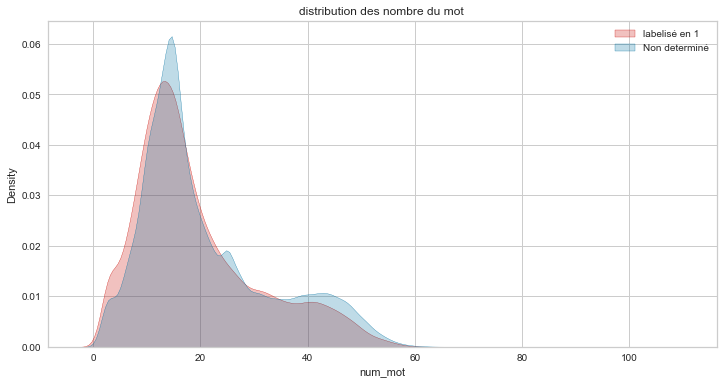

In [950]:
fig=plt.figure(figsize=(12, 6))
sns.kdeplot(data[data['id_evt']>0]['num_mot'], shade=True, color='r').set_title('distribution des nombre du mot ')
p5=sns.kdeplot(data[data['id_evt'].isna()]['num_mot'], shade=True, color='b')
plt.legend(['labelisé en 1','Non determiné'])
plt.show()

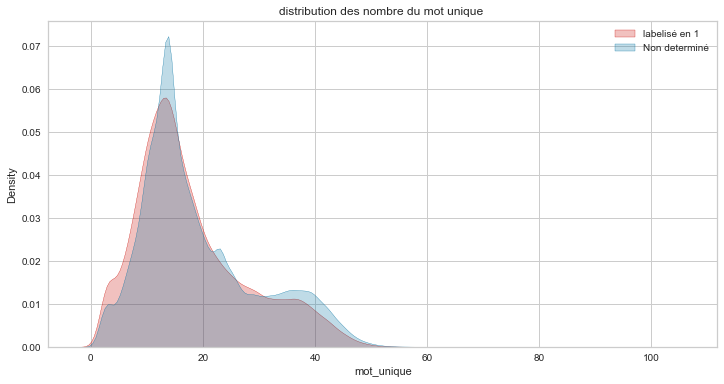

In [951]:
fig=plt.figure(figsize=(12, 6))
sns.kdeplot(data[data['id_evt']>0]['mot_unique'], shade=True, color='r').set_title('distribution des nombre du mot unique ')
p5=sns.kdeplot(data[data['id_evt'].isna()]['mot_unique'], shade=True, color='b')
plt.legend(['labelisé en 1','Non determiné'])
plt.show()

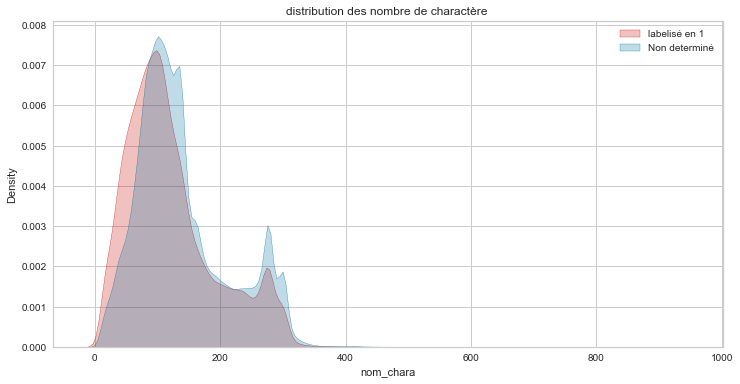

In [952]:
fig=plt.figure(figsize=(12, 6))
sns.kdeplot(data[data['id_evt']>0]['nom_chara'], shade=True, color='r').set_title('distribution des nombre de charactère ')
p5=sns.kdeplot(data[data['id_evt'].isna()]['nom_chara'], shade=True, color='b')
plt.legend(['labelisé en 1','Non determiné'])
plt.show()

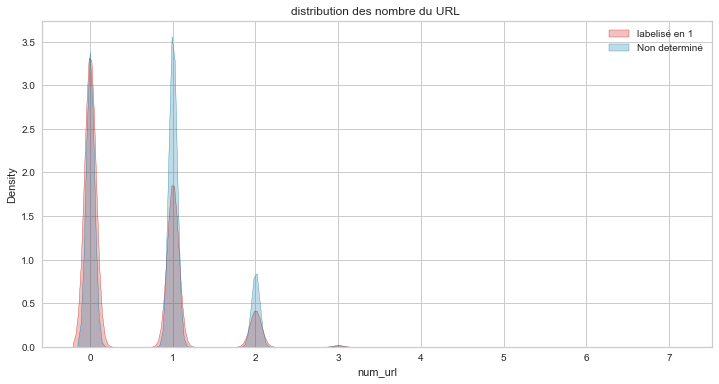

In [953]:
fig=plt.figure(figsize=(12, 6))
sns.kdeplot(data[data['id_evt']>0]['num_url'], shade=True, color='r').set_title('distribution des nombre du URL ')
p5=sns.kdeplot(data[data['id_evt'].isna()]['num_url'], shade=True, color='b')
plt.legend(['labelisé en 1','Non determiné'])
plt.show()

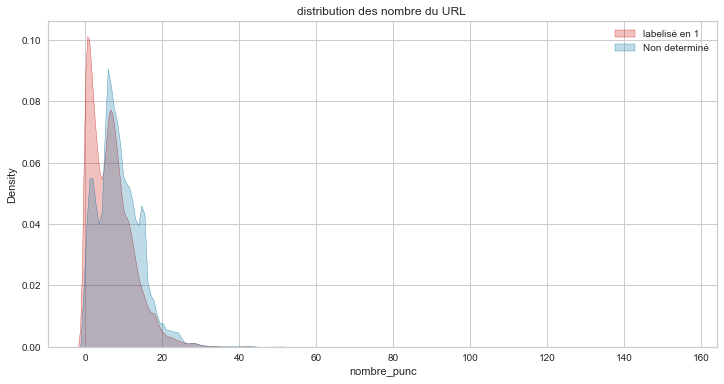

In [954]:
fig=plt.figure(figsize=(12, 6))
sns.kdeplot(data[data['id_evt']>0]['nombre_punc'], shade=True, color='r').set_title('distribution des nombre du URL ')
p5=sns.kdeplot(data[data['id_evt'].isna()]['nombre_punc'], shade=True, color='b')
plt.legend(['labelisé en 1','Non determiné'])
plt.show()

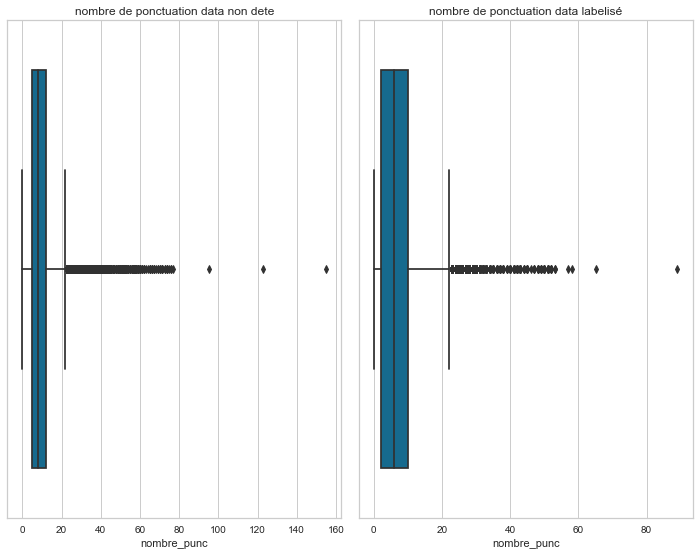

In [1280]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,8))

sns.boxplot(data=data[data['target']=='non_determiné'],x='nombre_punc',ax=ax1).set_title('nombre de ponctuation data non dete')

sns.boxplot(data=data_label,x='nombre_punc',ax=ax2).set_title('nombre de ponctuation data labelisé')

fig.tight_layout()
plt.show()

In [1287]:
c=data[data['target']=='non_determiné']
c[c['nombre_punc']>23]

index                 time_date user_lang tweet_coordinates_geojson  \
1            1 2019-07-26 13:03:46+00:00      None                      None   
48          48 2021-06-13 02:30:00+00:00      None                      None   
67          67 2021-06-13 09:35:56+00:00      None                      None   
98          98 2021-06-13 16:19:23+00:00      None                      None   
330        330 2019-07-27 02:00:33+00:00      None                      None   
...        ...                       ...       ...                       ...   
517240  517240 2019-07-26 08:37:50+00:00      None                      None   
517241  517241 2019-07-26 08:38:18+00:00      None                      None   
517242  517242 2019-07-26 08:38:33+00:00      None                      None   
517243  517243 2019-07-26 08:40:56+00:00      None                      None   
517259  517259 2019-07-26 10:36:54+00:00      None                      None   

        loc_point_geojson  doublon country  \
1                     NaN    False    None   
48                    NaN    False    None   
67                    NaN    False    None   
98                    NaN    False    None   
330                   NaN    False    None   
...                   ...      ...     ...   
517240                NaN    False    None   
517241                NaN    False    None   
517242                NaN    False    None   
517243                NaN    False    None   
517259                NaN    False    None   

                                             tweet_source  \
1       <a href="http://twitter.com/download/android" ...   
48      <a href="https://mobile.twitter.com" rel="nofo...   
67      <a href="https://mobile.twitter.com" rel="nofo...   
98      <a href="https://mobile.twitter.com" rel="nofo...   
330     <a href="http://twitter.com/download/android" ...   
...                                                   ...   
517240  <a href="http://twitter.com/download/android" ...   
517241  <a href="http://twitter.com/download/android" ...   
517242  <a href="http://twitter.com/download/android" ...   
517243  <a href="http://twitter.com/download/android" ...   
517259  <a href="https://mobile.twitter.com" rel="nofo...   

        tweet_current_user_retweet              user_location  ...  \
1                             -1.0                       None  ...   
48                            -1.0                Milky Way.   ...   
67                            -1.0  Adelaide, South Australia  ...   
98                            -1.0                Sevran (93)  ...   
330                           -1.0          Marseille, France  ...   
...                            ...                        ...  ...   
517240                        -1.0            Nice, France 🇫🇷  ...   
517241                        -1.0            Nice, France 🇫🇷  ...   
517242                        -1.0            Nice, France 🇫🇷  ...   
517243                        -1.0                       None  ...   
517259                        -1.0                       None  ...   

       num_point_exclamation  num_point_interrogation  \
1                          0                        0   
48                         1                        1   
67                         0                        0   
98                         0                        0   
330                        0                        0   
...                      ...                      ...   
517240                     0                        0   
517241                     0                        0   
517242                     0                        0   
517243                     0                        0   
517259                     0                        0   

                                             tweets_clean  Non Alphanumeric  \
1       Tremblement de terre M3.1 - FRANCE - 31km de L...                33   
48      ⚠️Vanuatu🇻🇺: A mild earthquake of magnitude mb...                53   

In [1282]:
data[data['target']=='non_determiné'].describe()

index  loc_point_geojson  tweet_current_user_retweet  \
count  447306.000000                0.0                    436744.0   
mean   273522.859271                NaN                        -1.0   
std    147362.552478                NaN                         0.0   
min         0.000000                NaN                        -1.0   
25%    155987.250000                NaN                        -1.0   
50%    278609.500000                NaN                        -1.0   
75%    402882.500000                NaN                        -1.0   
max    517300.000000                NaN                        -1.0   

       user_geo_enabled  user_favorites_count  tweet_retweet_count  \
count     442129.000000          4.421290e+05        442129.000000   
mean           0.323372          9.858549e+03             0.011517   
std            0.467764          3.166456e+04             0.537487   
min            0.000000          0.000000e+00             0.000000   
25%            0.000000          1.300000e+01             0.000000   
50%            0.000000          7.630000e+02             0.000000   
75%            1.000000          6.615000e+03             0.000000   
max            1.000000          1.724359e+06           184.000000   

       user_followers_count  tweet_coordinates_longitude  \
count          4.421290e+05                  2071.000000   
mean           3.046802e+04                   -83.560699   
std            2.615164e+05                    95.394546   
min            0.000000e+00                  -180.000000   
25%            1.000000e+02                  -150.139500   
50%            3.990000e+02                  -148.978000   
75%            1.979000e+03                   -64.150000   
max            1.028356e+07                   177.268000   

       tweet_quoted_status_id  tweet_coordinates_latitude  ...  num_stop_word  \
count            4.367440e+05                 2071.000000  ...  447306.000000   
mean             9.486159e+16                   38.615126  ...       0.324492   
std              3.327255e+17                   33.073701  ...       0.720781   
min             -1.000000e+00                  -59.421000  ...       0.000000   
25%             -1.000000e+00                   18.375000  ...       0.000000   
50%             -1.000000e+00                   61.955000  ...       0.000000   
75%             -1.000000e+00                   62.333500  ...       0.000000   
max              1.583171e+18                   85.051129  ...      24.000000   

             num_url        moy_mot      nom_chara    nombre_punc  \
count  447306.000000  447306.000000  447306.000000  447306.000000   
mean        0.691616       6.057660     138.572505       8.722177   
std         0.674741       1.570111      73.816329       5.741770   
min         0.000000       1.714286       6.000000       0.000000   
25%         0.000000       5.000000      87.000000       5.000000   
50%         1.000000       5.785714     120.000000       8.000000   
75%         1.000000       6.818182     174.000000      12.000000   
max         7.000000      76.500000     937.000000     155.000000   

       nombre_mention  num_point_exclamation  num_point_interrogation  \
count   447306.000000          447306.000000            447306.000000   
mean         6.312654               0.125341                 0.119748   
std         19.591058               0.585232                 0.515680   
min          0.000000               0.000000                 0.000000   
25%          0.000000               0.000000                 0.000000   
50%          0.000000               0.000000                 0.000000   
75%         10.000000               0.000000                 0.000000   
max        748.000000              54.000000                36.000000   

       Non Alphanumeric  new_targety  
count     447306.000000      33882.0  
mean          13.440495          0.0  
std            8.387276          0.0  
min            0.000000          0.0 

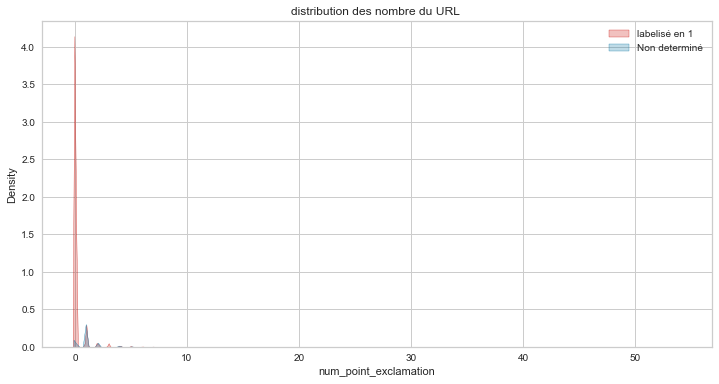

In [955]:
fig=plt.figure(figsize=(12, 6))
sns.kdeplot(data[data['id_evt']>0]['num_point_exclamation'], shade=True, color='r').set_title('distribution des nombre du URL ')
p5=sns.kdeplot(data[data['id_evt'].isna()]['num_point_exclamation'], shade=True, color='b')
plt.legend(['labelisé en 1','Non determiné'])
plt.show()

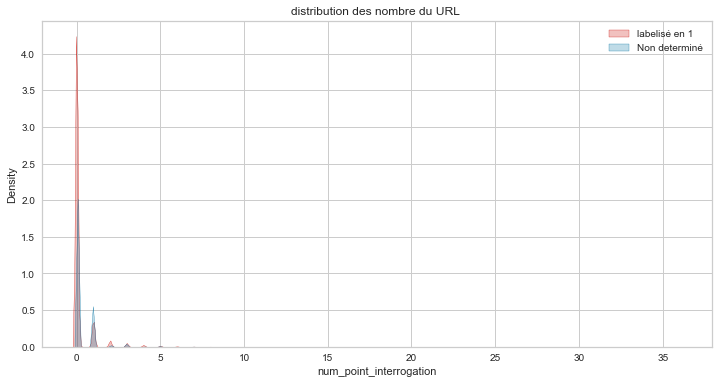

In [956]:
fig=plt.figure(figsize=(12, 6))
sns.kdeplot(data[data['id_evt']>0]['num_point_interrogation'], shade=True, color='r').set_title('distribution des nombre du URL ')
p5=sns.kdeplot(data[data['id_evt'].isna()]['num_point_interrogation'], shade=True, color='b')
plt.legend(['labelisé en 1','Non determiné'])
plt.show()

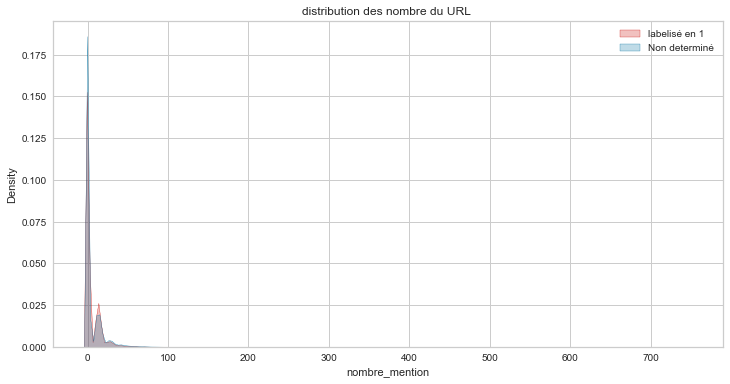

In [957]:
fig=plt.figure(figsize=(12, 6))
sns.kdeplot(data[data['id_evt']>0]['nombre_mention'], shade=True, color='r').set_title('distribution des nombre du URL ')
p5=sns.kdeplot(data[data['id_evt'].isna()]['nombre_mention'], shade=True, color='b')
plt.legend(['labelisé en 1','Non determiné'])
plt.show()

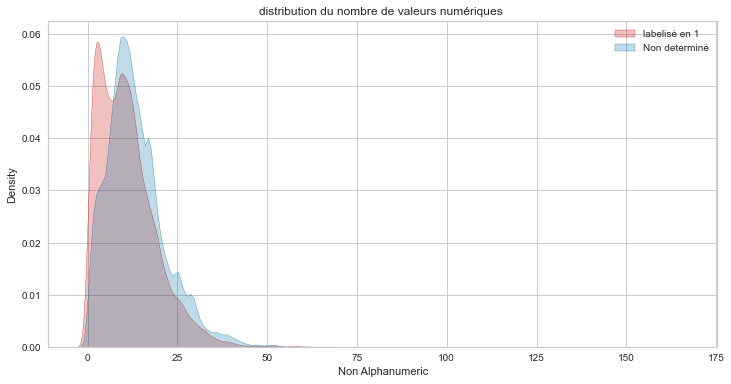

In [959]:
fig=plt.figure(figsize=(12, 6))
sns.kdeplot(data[data['id_evt']>0]['Non Alphanumeric'], shade=True, color='r').set_title('distribution du nombre de valeurs numériques ')
p5=sns.kdeplot(data[data['id_evt'].isna()]['Non Alphanumeric'], shade=True, color='b')
plt.legend(['labelisé en 1','Non determiné'])
plt.show()

### Utilisation du clustering pour détecter des clustering

In [960]:
data_cluster=data

data_cluster=data_cluster[['num_mot','mot_unique','num_stop_word','num_url','moy_mot','nom_chara','nombre_punc','nombre_mention','num_point_exclamation','num_point_interrogation','Non Alphanumeric']]

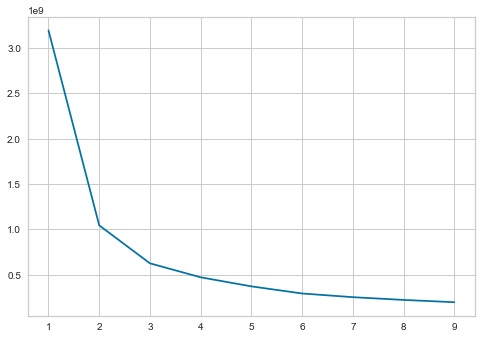

In [961]:
from sklearn.cluster import KMeans

X=data_cluster.values
dist=[]

K=range(1,10)

for k in K:
    
    km=KMeans(n_clusters=k,random_state=42)
    km.fit(X)
    dist.append(km.inertia_)
    
plt.plot(K,dist)

plt.show()


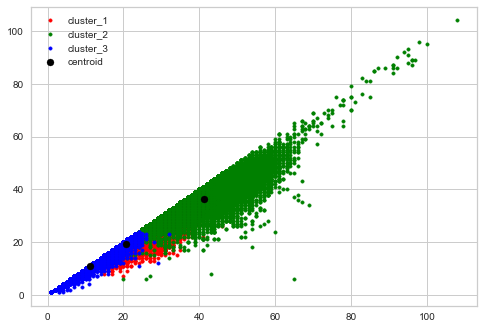

In [971]:
km=KMeans(n_clusters=4,random_state=42)

y_means=km.fit_predict(X)

#visualisation des clusters
plt.scatter(X[y_means==0,0],X[y_means==0,1],c='red',marker='.',label='cluster_1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],c='green',marker='.',label='cluster_2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],c='blue',marker='.',label='cluster_3')

#visualisation des centroids

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c='black',label='centroid')

plt.legend()
plt.show()





### Remarque sur le clustering :

- clustering des valeurs numériques ne donne pas des insight qui peuvent nous intéresser

## Stratégie de labelisation

# Labelisation 
- si ID_evt >0 target =1
- la fréquence branche amine
- si le nombre de caractère >280 target =0
- si le nombre de mot <3 : target =0
- si le sentiment est postif avec un seuil de 0.85 target 0
- Clustering après les predictions.

- Vectorization zvec 2 à 3 mots on prend ngram=2


- **sur ue data de 50000**


### Analyse de sentiment sur toute les données

In [ ]:
# remove stop words

tokens=[]

for t in data['tweets_clean']:
    
    word_tokens=[]
    
    for w in re.sub('\W'," ",t).split():
        
        word_tokens.append(w)
    tokens.append(word_tokens)
    
data['word_tokens']=tokens

filtred_words=[]

for c in data['word_tokens']:
    
    filterd=[w for w in c if not w in stop_word]
    
    filtred_words.append(' '.join(filterd))
    
data['text_after_preprocess']=filtred_words

sentiment_list=[]

for i in data['text_after_preprocess']:
    
    vs=tb(i).sentiment[0]
    
    if vs>0.85:
        sentiment_list.append('Positive')
    elif vs<0.6:
        sentiment_list.append('Negatif')
        
    else:
        sentiment_list.append('Neutre')
        
data['sentiment']=sentiment_list



In [1291]:
c=data[data['target']=='non_determiné']
c[c['nombre_punc']>23]

index                 time_date user_lang tweet_coordinates_geojson  \
1            1 2019-07-26 13:03:46+00:00      None                      None   
48          48 2021-06-13 02:30:00+00:00      None                      None   
67          67 2021-06-13 09:35:56+00:00      None                      None   
98          98 2021-06-13 16:19:23+00:00      None                      None   
330        330 2019-07-27 02:00:33+00:00      None                      None   
...        ...                       ...       ...                       ...   
517240  517240 2019-07-26 08:37:50+00:00      None                      None   
517241  517241 2019-07-26 08:38:18+00:00      None                      None   
517242  517242 2019-07-26 08:38:33+00:00      None                      None   
517243  517243 2019-07-26 08:40:56+00:00      None                      None   
517259  517259 2019-07-26 10:36:54+00:00      None                      None   

        loc_point_geojson  doublon country  \
1                     NaN    False    None   
48                    NaN    False    None   
67                    NaN    False    None   
98                    NaN    False    None   
330                   NaN    False    None   
...                   ...      ...     ...   
517240                NaN    False    None   
517241                NaN    False    None   
517242                NaN    False    None   
517243                NaN    False    None   
517259                NaN    False    None   

                                             tweet_source  \
1       <a href="http://twitter.com/download/android" ...   
48      <a href="https://mobile.twitter.com" rel="nofo...   
67      <a href="https://mobile.twitter.com" rel="nofo...   
98      <a href="https://mobile.twitter.com" rel="nofo...   
330     <a href="http://twitter.com/download/android" ...   
...                                                   ...   
517240  <a href="http://twitter.com/download/android" ...   
517241  <a href="http://twitter.com/download/android" ...   
517242  <a href="http://twitter.com/download/android" ...   
517243  <a href="http://twitter.com/download/android" ...   
517259  <a href="https://mobile.twitter.com" rel="nofo...   

        tweet_current_user_retweet              user_location  ...  \
1                             -1.0                       None  ...   
48                            -1.0                Milky Way.   ...   
67                            -1.0  Adelaide, South Australia  ...   
98                            -1.0                Sevran (93)  ...   
330                           -1.0          Marseille, France  ...   
...                            ...                        ...  ...   
517240                        -1.0            Nice, France 🇫🇷  ...   
517241                        -1.0            Nice, France 🇫🇷  ...   
517242                        -1.0            Nice, France 🇫🇷  ...   
517243                        -1.0                       None  ...   
517259                        -1.0                       None  ...   

       num_point_exclamation  num_point_interrogation  \
1                          0                        0   
48                         1                        1   
67                         0                        0   
98                         0                        0   
330                        0                        0   
...                      ...                      ...   
517240                     0                        0   
517241                     0                        0   
517242                     0                        0   
517243                     0                        0   
517259                     0                        0   

                                             tweets_clean  Non Alphanumeric  \
1       Tremblement de terre M3.1 - FRANCE - 31km de L...                33   
48      ⚠️Vanuatu🇻🇺: A mild earthquake of magnitude mb...                53   

In [1315]:
data['target']=np.where(data['id_evt']>0,1,'non_determiné')
data['target_final']=np.where(((data['target']=="non_determiné") & ((data['nom_chara'] > 280) | (data['num_mot'] <= 3) | (data['sentiment']=='Positive') | (data['nombre_punc']>25) )),0,data['target'])

In [1316]:
data['target_final'].value_counts()

non_determiné    410903
1                 69995
0                 36403
Name: target_final, dtype: int64

In [1317]:
data_final=data[data['target_final']!='non_determiné'][['mot_unique','sentiment','text_after_preprocess','Non Alphanumeric','num_point_interrogation','num_point_exclamation','nombre_mention','nombre_punc','nom_chara','moy_mot','len_hashtags',
       'len_mentions', 'num_mot', 'mot_unique', 'num_stop_word', 'num_url','target_final']]

#data_prod=data[data[data['target_final']=='non_determiné'][['mot_unique','sentiment','text_after_preprocess','Non Alphanumeric','num_point_interrogation','num_point_exclamation','nombre_mention','nombre_punc','nom_chara','moy_mot','len_hashtags',
       #'len_mentions', 'num_mot', 'mot_unique', 'num_stop_word', 'num_url','target_final']]]

### Notre data final

In [1299]:
data_final.head(5)

mot_unique sentiment                              text_after_preprocess  \
1           31   Negatif  Tremblement terre M3 1 FRANCE 31km La Teste Bu...   
7           43   Negatif  _msd C quoi cette histoire déjà Selon imam tre...   
19          36   Negatif  _msd comme Vatican bonnes sœurs violé partouze...   
28          41   Negatif  Je finis 1 livre intéressant Mohamed BALHI Dey...   
48          29   Negatif  Vanuatu A mild earthquake magnitude mb 4 5 reg...   

    Non Alphanumeric  num_point_interrogation  num_point_exclamation  \
1                 33                        0                      0   
7                 22                        2                      0   
19                26                        0                      0   
28                16                        0                      0   
48                53                        1                      1   

    nombre_mention  nombre_punc  nom_chara   moy_mot  len_hashtags  \
1                0           31        236  5.583333             0   
7               94           13        301  5.404255             1   
19              97           13        294  5.813953             0   
28               0            6        303  5.586957             0   
48               0           44        304  8.838710             4   

    len_mentions  num_mot  mot_unique  num_stop_word  num_url target_final  
1              0       36          31              1        2            0  
7              7       47          43              0        0            0  
19             7       43          36              0        0            0  
28             0       46          41              1        1            0  
48             0       31          29              7        2            0

In [1318]:
data_final['target_final']=data_final['target_final'].astype('int')

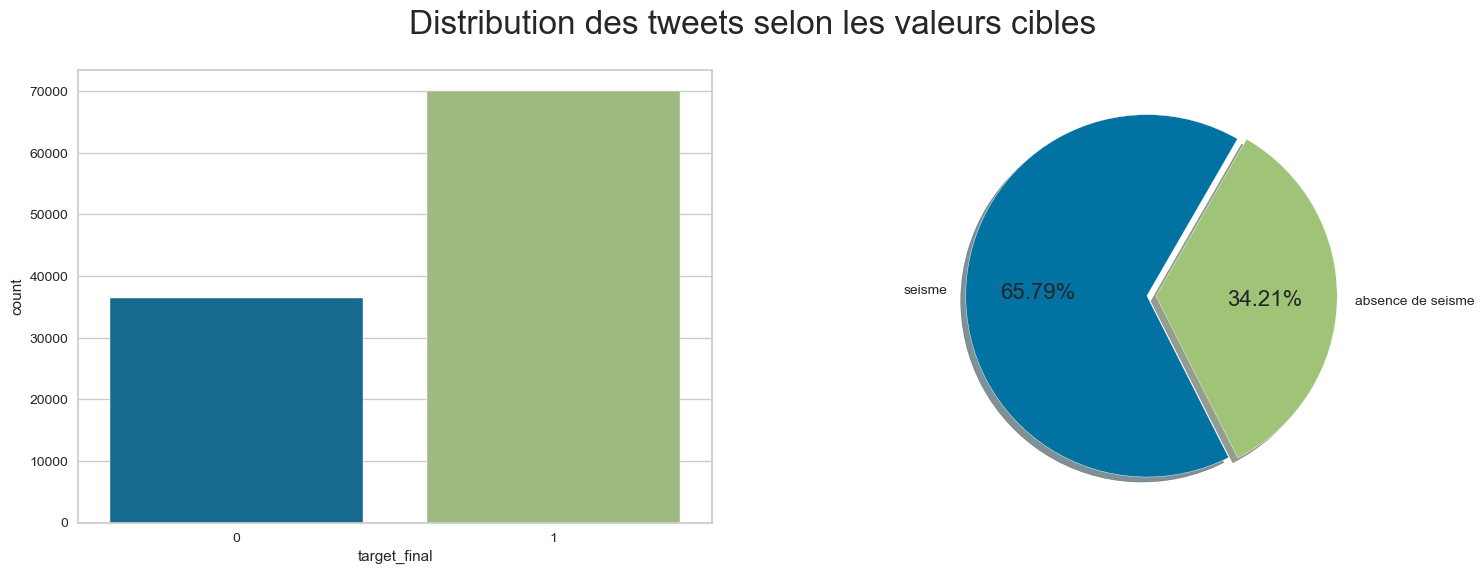

In [1319]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(18, 6), dpi=100)
sns.countplot(data_final['target_final'], ax=axes[0])
axes[1].pie(data_final['target_final'].value_counts(),
            labels=['seisme', 'absence de seisme'],
            autopct='%1.2f%%',
            shadow=True,
            explode=(0.05, 0),
            startangle=60)
fig.suptitle('Distribution des tweets selon les valeurs cibles', fontsize=24)
plt.show()

### Remarque :

- les données ne sont pas balancées

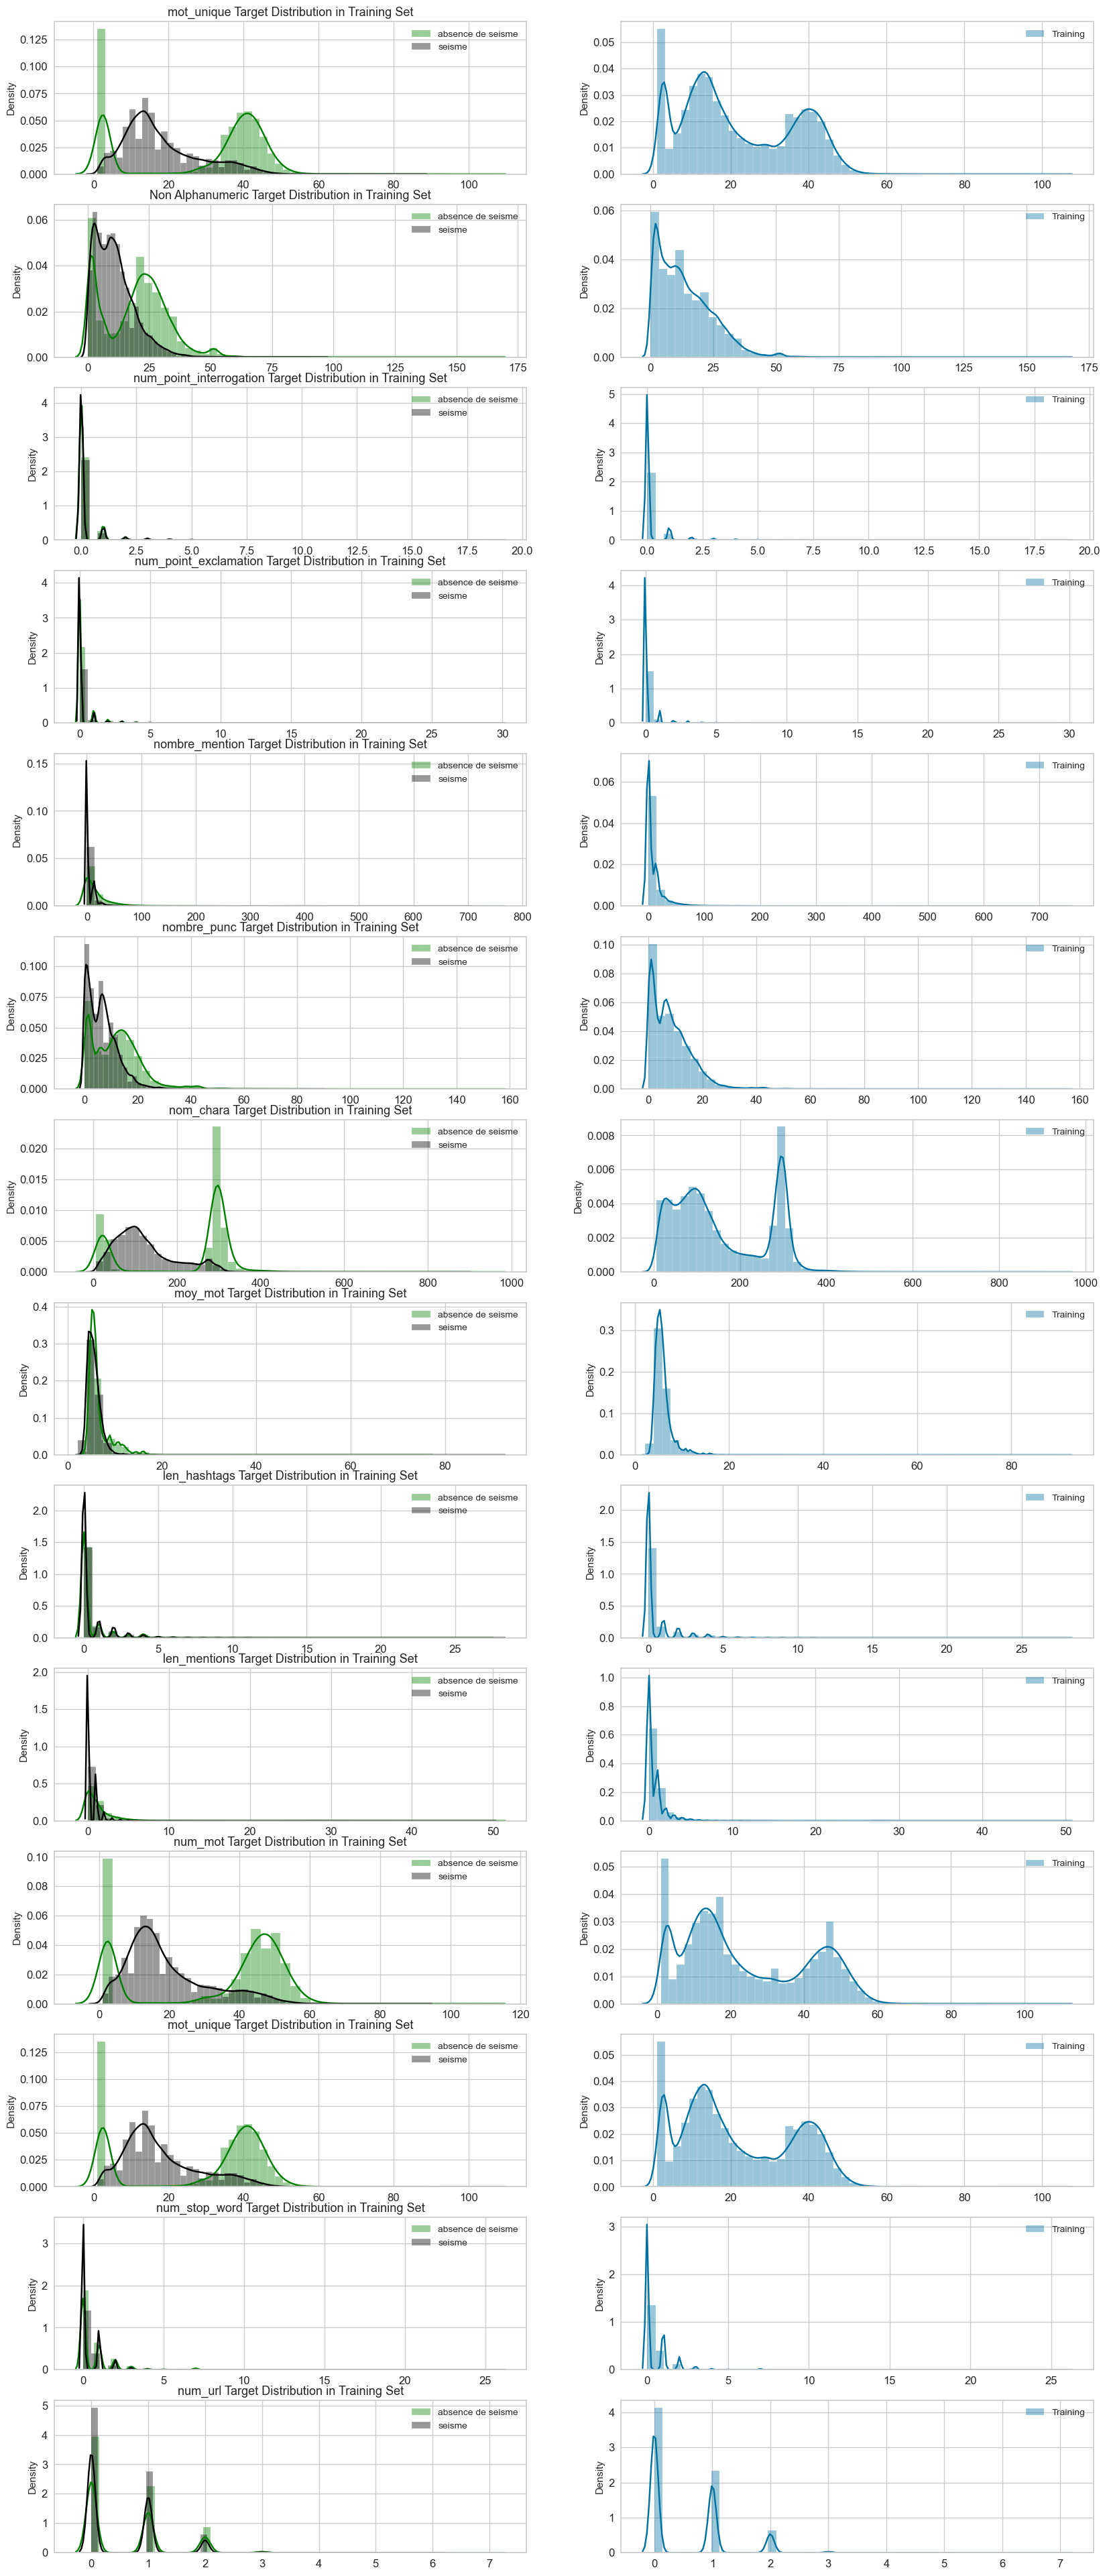

In [1262]:
METAFEATURES = ['mot_unique', 'Non Alphanumeric',
       'num_point_interrogation', 'num_point_exclamation', 'nombre_mention',
       'nombre_punc', 'nom_chara', 'moy_mot', 'len_hashtags', 'len_mentions',
       'num_mot', 'mot_unique', 'num_stop_word', 'num_url']
tweets_seisme = data_final['target_final'] == 1

fig, axes = plt.subplots(ncols=2, nrows=len(METAFEATURES), figsize=(20, 50), dpi=100)

for i, feature in enumerate(METAFEATURES):
    sns.distplot(data_final.loc[~tweets_seisme][feature], label='absence de seisme', ax=axes[i][0], color='green')
    sns.distplot(data_final.loc[tweets_seisme][feature], label='seisme', ax=axes[i][0], color='black')

    sns.distplot(data_final[feature], label='Training', ax=axes[i][1])
    #sns.distplot(df_test[feature], label='Test', ax=axes[i][1])
    
    for j in range(2):
        axes[i][j].set_xlabel('')
        axes[i][j].tick_params(axis='x', labelsize=12)
        axes[i][j].tick_params(axis='y', labelsize=12)
        axes[i][j].legend()
    
    axes[i][0].set_title(f'{feature} Target Distribution in Training Set', fontsize=13)
    #axes[i][1].set_title(f'{feature} Training & Test Set Distribution', fontsize=13)

plt.show()

## Création du model Machine Learning

- 1- Sans feature engineering

In [1320]:
X=data_final['text_after_preprocess']
Y=data_final['target_final']

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)




In [1321]:
print(X.shape)
print(Y.shape)

print(X_train.shape)
print(X_test.shape)

(106398,)
(106398,)
(85118,)
(21280,)


In [1322]:
# on vectorise nos texts

from sklearn.feature_extraction.text import TfidfVectorizer

vec=TfidfVectorizer(lowercase='True')
X_train_feat=vec.fit_transform(X_train)
X_test_feat=vec.transform(X_test)



In [1323]:
print(X_train.shape)

(85118,)


In [1334]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB


mean_res=[]

accuracy=[]

std=[]

classifiers=['Support Vector Machine','Logistic Regression','Naive Bayes','Random Forest']

models=[svm.SVC(kernel='linear'),LogisticRegression(),GaussianNB(),RandomForestClassifier()]

for i in models:
    
    model=i
    
    cv=cross_val_score(model,X_train_feat,Y_train,cv=10,scoring='accuracy')
    cv=cv
    mean_res.append(cv.mean())
    std.append(cv.std())
    accuracy.append(cv)
models_df=pd.DataFrame({'CV Mean':mean_res,'Std':std},index=classifiers)       
models_df

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\adminn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\adminn\anaconda3\lib\site-packages\sklearn\naive_bayes.py", line 243, in fit
    return self._partial_fit(
  File "C:\Users\adminn\anaconda3\lib\site-packages\sklearn\naive_bayes.py", line 400, in _partial_fit
    X, y = self._validate_data(X, y, reset=first_call)
  File "C:\Users\adminn\anaconda3\lib\site-packages\sklearn\base.py", line 596, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\adminn\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 1074, in check_X_y
    X = check_array(
  File "C:\Users\adminn\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 822, in check_array
    array = _ensure_sparse_format(
  File "C:\Users\adminn\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 512, in _ensure_sparse_format
    raise TypeError(
TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.


<85118x71274 sparse matrix of type '<class 'numpy.float64'>'
	with 1088413 stored elements in Compressed Sparse Row format>

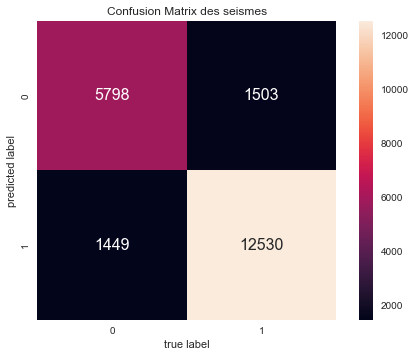

In [1339]:
clf=LogisticRegression()

clf.fit(X_train_feat,Y_train)

y_pred=clf.predict(X_test_feat)

In [1340]:
print("train accuracy:",clf.score(X_train_feat, Y_train),"\n","test accuracy:",clf.score(X_test_feat,Y_test))


train accuracy: 0.8906341784346437 
 test accuracy: 0.8612781954887218


In [1341]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print("precision est {}".format(precision_score(Y_test, y_pred)))

print("rappel est {}".format(recall_score(Y_test, y_pred)))



precision est 0.8963445167751627
rappel est 0.892895318178579


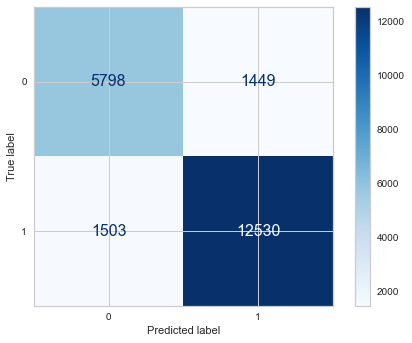

In [1342]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(clf, X_test_feat, Y_test,cmap="Blues")

In [1343]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
rf=RandomForestClassifier(random_state=42)
model4=rf.fit(X_train_feat, Y_train)
print("train accuracy:",model4.score(X_train_feat, Y_train),"\n","test accuracy:",model4.score(X_test_feat,Y_test))

rfpred = rf.predict(X_test_feat)
print("\n")
print("classification report for random forest classifier")
print(classification_report(Y_test,rfpred))
print("\n")
print("confusion matrix for random forest classifier")


train accuracy: 0.9771023755257408 
 test accuracy: 0.8892857142857142


classification report for random forest classifier
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      7247
           1       0.92      0.92      0.92     14033

    accuracy                           0.89     21280
   macro avg       0.88      0.88      0.88     21280
weighted avg       0.89      0.89      0.89     21280



confusion matrix for random forest classifier


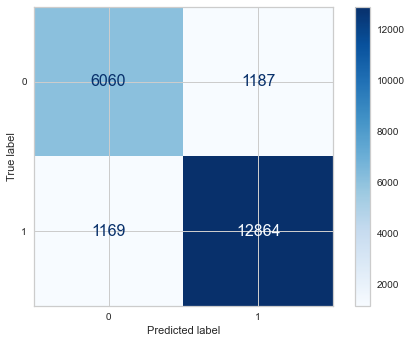

In [1344]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(rf, X_test_feat, Y_test,cmap="Blues")

In [369]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adminn\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [534]:
data['date']=data['date'].astype('datetime64[ns]')

In [582]:
data[['date']]

date
time_date                           
2019-07-26 12:59:53+00:00 2019-07-26
2019-07-26 13:03:46+00:00 2019-07-26
2019-07-26 13:06:10+00:00 2019-07-26
2019-07-26 13:13:42+00:00 2019-07-26
2019-07-26 13:57:45+00:00 2019-07-26
...                              ...
2019-07-26 12:49:09+00:00 2019-07-26
2019-07-26 12:55:10+00:00 2019-07-26
2019-07-26 12:56:43+00:00 2019-07-26
2019-07-26 12:58:07+00:00 2019-07-26
2019-07-26 12:59:05+00:00 2019-07-26

[517301 rows x 1 columns]

In [597]:
data_f=data.merge(seisme_df,on='date',how='outer', indicator=True)
data_f = data_f[data_f['_merge'] == 'left_only']

In [600]:
missing_values(data_f).loc['id_evt']

total_missing      448685.000000
percent_missing         0.859356
Name: id_evt, dtype: float64

In [588]:
data_f.id_evt.isnull().sum()

448685

In [580]:
i=data_f.sample(1).index[0]
print(data_f['tweet_text'].iloc[i])
print(data_f['id_evt'].iloc[i])

Sur le site du ReNaSS, les coordonnées de l'épicentre du (petit) séisme donnent les alentours du château de Pourtales, à Strasbourg - Robertsau
272.0


<a id='3'></a>


<h1 style="background-color:#87CEFA	;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">1er approche</h1>

In [819]:
data[['tweet_created_at']]

tweet_created_at
0      2019-07-26 12:59:53
1      2019-07-26 13:03:46
2      2019-07-26 13:06:10
3      2019-07-26 13:13:42
4      2019-07-26 13:57:45
...                    ...
517296 2019-07-26 12:49:09
517297 2019-07-26 12:55:10
517298 2019-07-26 12:56:43
517299 2019-07-26 12:58:07
517300 2019-07-26 12:59:05

[517301 rows x 1 columns]

### Definition d'une fenetre 

In [820]:
id_evt_pos=data[data['id_evt']>0]
maxi_tweet_date=id_evt_pos.groupby('id_evt')['tweet_created_at'].max().reset_index()
min_tweet_date=id_evt_pos.groupby('id_evt')['tweet_created_at'].min().reset_index()
date_mini_maxi_df=min_tweet_date.merge(maxi_tweet_date,how='inner',on='id_evt')
date_mini_maxi_df.rename(columns={'tweet_created_at_x':'debut_tweet','tweet_created_at_y':'fin_tweet'},inplace=True)
date_mini_maxi_df['diff_debut_fin']=date_mini_maxi_df['fin_tweet']-date_mini_maxi_df['debut_tweet']
date_mini_maxi_df['day']=date_mini_maxi_df['diff_debut_fin'].dt.components.days
date_mini_maxi_df['hour']=date_mini_maxi_df['diff_debut_fin'].dt.components.hours
date_mini_maxi_df['minutes']=date_mini_maxi_df['diff_debut_fin'].dt.components.minutes
date_mini_maxi_df['seconds']=date_mini_maxi_df['diff_debut_fin'].dt.components.seconds

date_mini_maxi_df


id_evt         debut_tweet           fin_tweet  diff_debut_fin  day  \
0     153.0 2017-04-17 07:24:13 2017-04-17 07:44:44 0 days 00:20:31    0   
1     154.0 2017-05-25 16:37:10 2017-05-25 17:20:11 0 days 00:43:01    0   
2     155.0 2017-09-15 12:59:17 2017-09-15 13:32:10 0 days 00:32:53    0   
3     156.0 2017-09-28 03:44:08 2017-09-28 04:19:31 0 days 00:35:23    0   
4     157.0 2018-01-02 22:00:32 2018-01-02 22:57:27 0 days 00:56:55    0   
..      ...                 ...                 ...             ...  ...   
158   382.0 2022-07-14 18:30:03 2022-07-14 18:31:25 0 days 00:01:22    0   
159   383.0 2022-07-17 02:13:14 2022-07-17 02:24:08 0 days 00:10:54    0   
160   384.0 2022-07-22 10:10:22 2022-07-22 10:44:13 0 days 00:33:51    0   
161   385.0 2022-07-27 02:59:19 2022-07-27 03:38:13 0 days 00:38:54    0   
162   386.0 2022-08-06 16:48:03 2022-08-06 16:48:58 0 days 00:00:55    0   

     hour  minutes  seconds  
0       0       20       31  
1       0       43        1  
2       0       32       53  
3       0       35       23  
4       0       56       55  
..    ...      ...      ...  
158     0        1       22  
159     0       10       54  
160     0       33       51  
161     0       38       54  
162     0        0       55  

[163 rows x 8 columns]

In [821]:
date_mini_maxi_df['minutes'].value_counts()

0     16
4     10
5      7
1      7
6      6
7      5
8      5
11     5
55     4
52     4
18     4
2      4
26     4
13     4
27     4
20     3
39     3
3      3
12     3
15     3
10     3
9      3
56     3
23     3
28     2
29     2
24     2
25     2
21     2
34     2
30     2
17     2
59     2
31     2
35     2
58     2
42     2
49     2
50     2
57     1
54     1
33     1
32     1
16     1
48     1
19     1
37     1
44     1
14     1
46     1
40     1
43     1
41     1
36     1
22     1
38     1
Name: minutes, dtype: int64

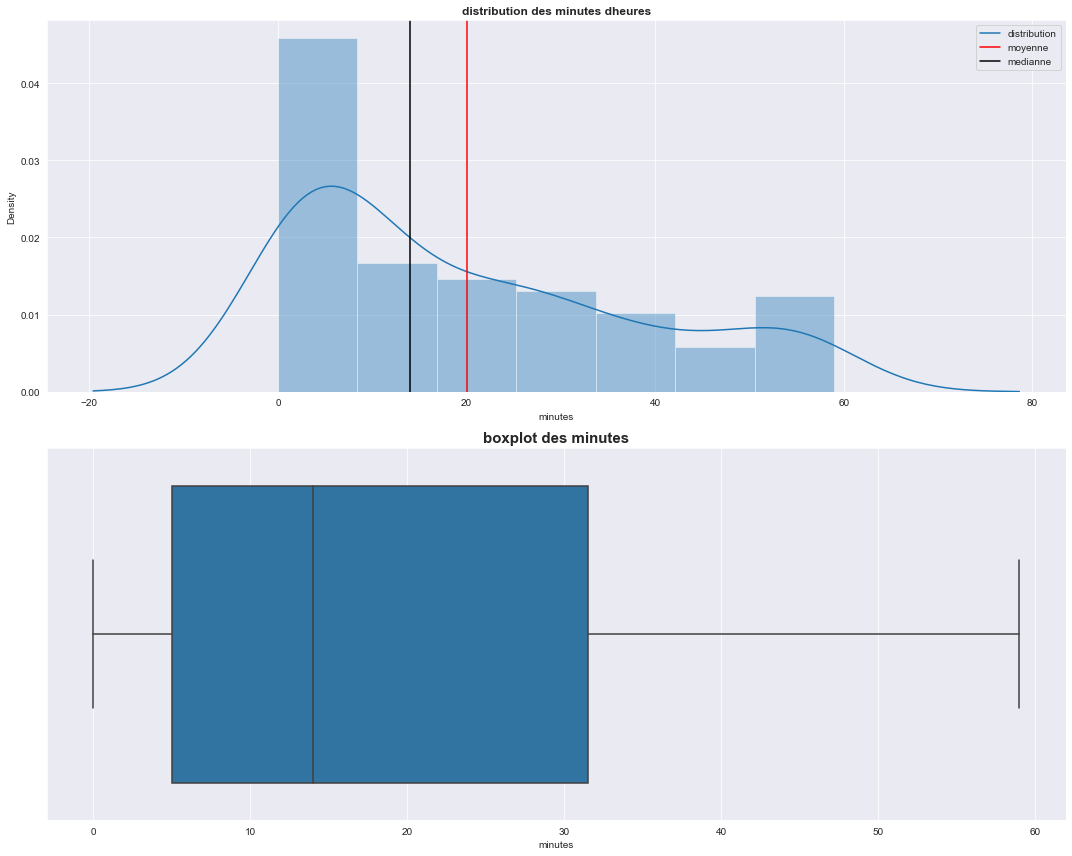

In [822]:
fig,(ax1,ax2)=plt.subplots(ncols=1,nrows=2,figsize=(15,12))
sns.distplot(date_mini_maxi_df['minutes'],kde=True,ax=ax1).set_title('distribution des minutes d''heures',fontweight='bold')
sns.boxplot(data=date_mini_maxi_df,x='minutes',ax=ax2).set_title('boxplot des minutes',fontweight='bold',fontsize=15)
ax1.axvline(date_mini_maxi_df['minutes'].mean(),color='red')
ax1.axvline(date_mini_maxi_df['minutes'].median(),color='black')
ax1.legend(['distribution','moyenne','medianne'])
# plt.title('distribution des minutes d''heures',fontweight='bold')

fig.tight_layout()

plt.show()

###  Remarques : 
- on définera notre fenetre comme la moyenne des minutes : 20 minutes

In [823]:
seisme_df=pd.read_csv('../Data/Liste_seismes_2017-2022.csv',sep=';')
seisme_df.head(5)

Date Heure            Localisation  Latitude  Longitude  \
0  2017-02-20 17:03:41.57              ENE Orthez   43.4917    -0.6465   
1  2017-04-26 15:12:10.88  SW Bagnères-de-Bigorre   42.9811     0.1370   
2  2017-05-08 02:08:27.15       NE Argelès-Gazost   43.0347     0.0206   
3  2017-09-28 01:43:22.76                 O Janzé   47.9614    -1.4372   
4  2017-10-25 03:41:17.67          SW Albertville   45.4286     6.3180   

   Profondeur Type Magnitude  Magnitude  IdSei (franceseisme)  \
0         5.0            MLv        3.5                   659   
1         7.7            MLv        3.7                   669   
2         7.5            MLv        3.4                   673   
3         4.5            MLv        3.9                   690   
4         3.1            MLv        3.7                   696   

   Intensite EMS98 maximale  
0                       5.0  
1                       4.0  
2                       4.0  
3                       4.0  
4                       4.5

In [824]:
seisme_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date Heure                46 non-null     object 
 1   Localisation              46 non-null     object 
 2   Latitude                  46 non-null     float64
 3   Longitude                 46 non-null     float64
 4   Profondeur                46 non-null     float64
 5   Type Magnitude            46 non-null     object 
 6   Magnitude                 46 non-null     float64
 7   IdSei (franceseisme)      46 non-null     int64  
 8   Intensite EMS98 maximale  46 non-null     float64
dtypes: float64(5), int64(1), object(3)
memory usage: 3.4+ KB


#### Remarque
- La colonne Date Heure est enregistré sous forme objet

In [825]:
seisme_df['Date Heure']=pd.to_datetime(seisme_df['Date Heure'])

In [826]:
print('type de magnitudes dans notre dataset {}'.format(seisme_df['Type Magnitude'].unique()))

type de magnitudes dans notre dataset ['MLv' 'ML']


In [827]:
print('les id des seismes {}'.format(seisme_df['IdSei (franceseisme)'].unique()))

les id des seismes [ 659  669  673  690  696  697  698  699  701  700  719  721  726  735
  774  796  802  819  858  889  921  930  931  952  982  988 1000 1048
 1049 1051 1052 1053 1072 1077 1080 1087 1086 1101 1110 1111 1113 1123
 1125 1126 1127 1146]


### définition des types de magnitude

- **type ML :Magnitude locale (Ml)** : utilisée pour des séismes proches, dits séismes locaux. Elle est définie à partir de l’amplitude maximale des ondes S modulée par la distance épicentrale. Elle est toujours moyennée sur plusieurs stations en tenant compte des corrections locales. Elle est principalement utilisée pour déterminer la magnitude des évènements locaux ou régionaux (distance séisme-station inférieure à ~1000km).

- **Magnitude MLv** : Magnitude locale calculée sur la composante verticale du sismogramme. Cette magnitude se détermine d’une façon équivalente à la magnitude Locale, c’est-à-dire à partir de l’amplitude maximale des ondes modulée par la distance épicentrale. C’est celle qui est utilisée sur ce site.

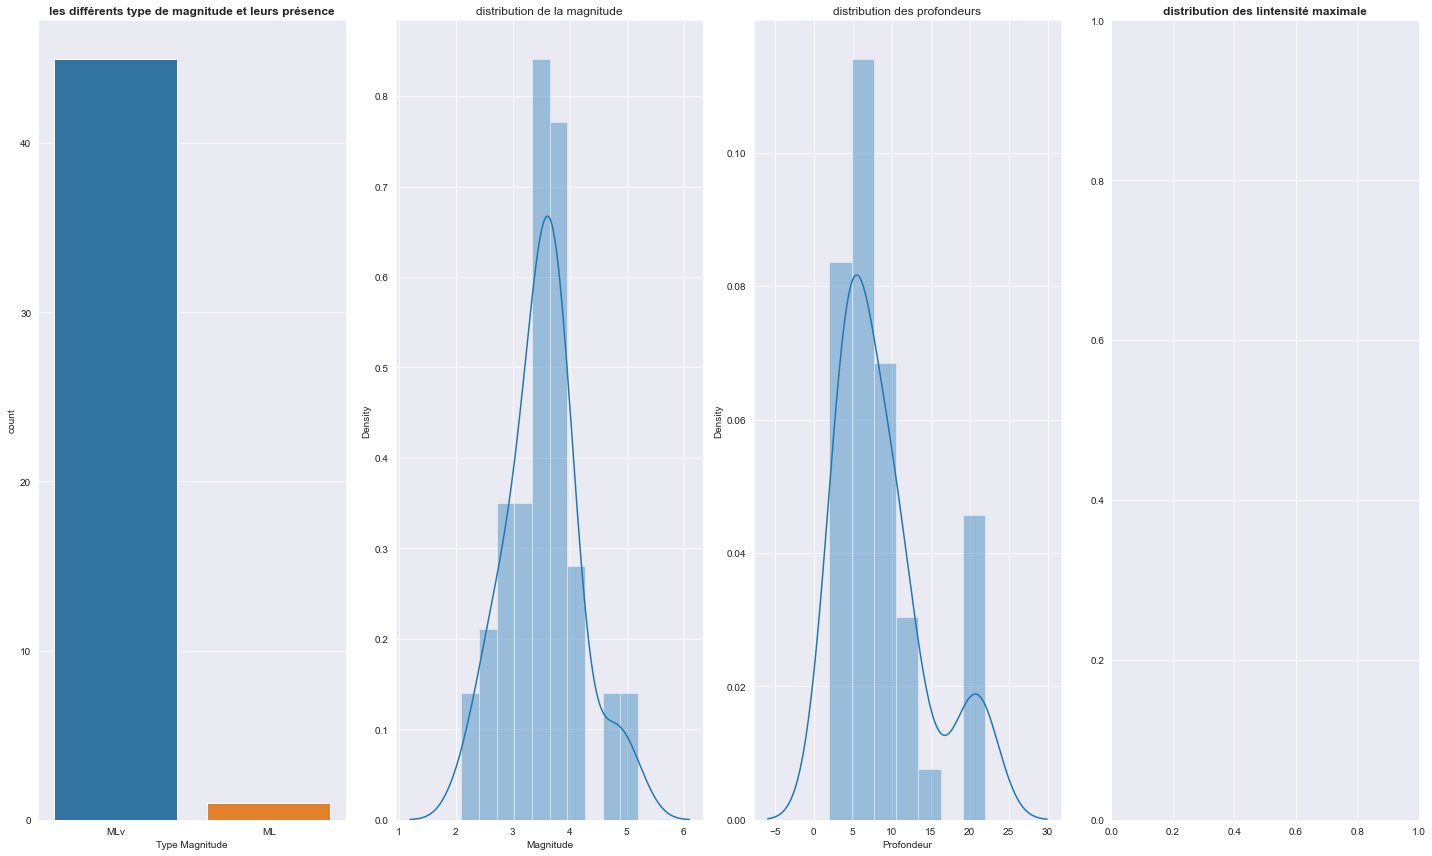

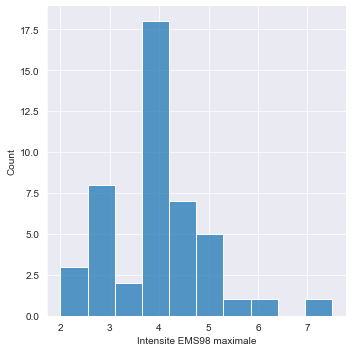

In [828]:
fig,(ax1,ax2,ax3,ax4)=plt.subplots(ncols=4,nrows=1,figsize=(20,12))

sns.countplot(data=seisme_df,x='Type Magnitude',ax=ax1)
ax1.set_title('les différents type de magnitude et leurs présence',fontweight='bold')
sns.distplot(seisme_df['Magnitude'],ax=ax2)
ax2.set_title('distribution de la magnitude')
sns.distplot(seisme_df['Profondeur'],ax=ax3)
ax3.set_title('distribution des profondeurs')
sns.displot(seisme_df['Intensite EMS98 maximale'],ax=ax4)
ax4.set_title('distribution des lintensité maximale',fontweight='bold')

fig.tight_layout()

plt.show()

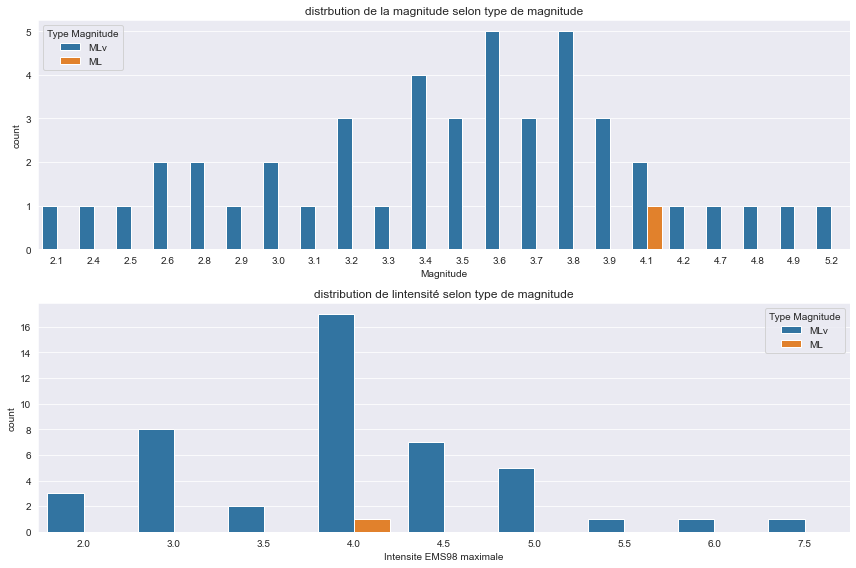

In [829]:
fig,(ax1,ax2)=plt.subplots(ncols=1,nrows=2,figsize=(12,8))
sns.countplot(data=seisme_df,x='Magnitude',hue='Type Magnitude',ax=ax1)
ax1.set_title('distrbution de la magnitude selon type de magnitude')
sns.countplot(data=seisme_df,x='Intensite EMS98 maximale',hue='Type Magnitude',ax=ax2)
ax2.set_title('distribution de l''intensité selon type de magnitude')
fig.tight_layout()
plt.show()


In [830]:
seisme=seisme_df.copy()
seisme['date_fin']=seisme['Date Heure']+pd.Timedelta(15,'m')
seisme.rename({'Date Heure':'date_debut'},inplace=True,axis=1)


In [831]:
i=seisme.sample(1).index[0]
print('heure de la donnée réelle {}'.format(seisme['date_debut'].iloc[i]))
print('-------apres modification-----------------')
print('heure de la donnée après ajout de 30 minutes {}'.format(seisme['date_fin'].iloc[i]))

heure de la donnée réelle 2021-01-22 18:33:45.290000
-------apres modification-----------------
heure de la donnée après ajout de 30 minutes 2021-01-22 18:48:45.290000


In [794]:
data_['tweet_created_at']

0        2019-07-26 12:59:53
1        2019-07-26 13:03:46
2        2019-07-26 13:06:10
3        2019-07-26 13:13:42
4        2019-07-26 13:57:45
                 ...        
517296   2019-07-26 12:49:09
517297   2019-07-26 12:55:10
517298   2019-07-26 12:56:43
517299   2019-07-26 12:58:07
517300   2019-07-26 12:59:05
Name: tweet_created_at, Length: 517301, dtype: datetime64[ns]

In [832]:
data['id']=data.index+1
seisme['id']=seisme.index+1

In [853]:
seisme.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date_debut                46 non-null     datetime64[ns]
 1   Localisation              46 non-null     object        
 2   Latitude                  46 non-null     float64       
 3   Longitude                 46 non-null     float64       
 4   Profondeur                46 non-null     float64       
 5   Type Magnitude            46 non-null     object        
 6   Magnitude                 46 non-null     float64       
 7   IdSei (franceseisme)      46 non-null     int64         
 8   Intensite EMS98 maximale  46 non-null     float64       
 9   date_fin                  46 non-null     datetime64[ns]
 10  id                        46 non-null     int64         
dtypes: datetime64[ns](2), float64(5), int64(2), object(2)
memory usage: 4.1+ KB


In [846]:
data['tweet_created_at'].iloc[0]

Timestamp('2019-07-26 12:59:53')

In [833]:
data_=data[['tweet_created_at','id_evt','tweet_text','id']]

# NEED HELP

In [856]:
from pandasql import sqldf
pysqldf=lambda q:sqldf(q,globals())

q="""
SELECT A.*, B.date_debut, B.date_fin

FROM 
   data_ A 
LEFT JOIN seisme B
ON
 A.id=B.id AND
 A.tweet_created_at>=B.date_debut AND A.tweet_created_at<=B.date_fin;
"""
final_data=pysqldf(q)

In [869]:
merged_df=data_.merge(seisme,how='outer',on='id')

def define_target(txt):
    
    if data[txt]>=data['date_debut'] and data[txt]<=data['date_fin']:
        return 1
    return 0
    
merged_df['target']=merged_df['tweet_created_at'].apply(lambda x: 1 if x>=merged_df['date_debut'] and x<=merged_df['date_fin'] else 0)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [870]:
missing_values(merged_df)

total_missing  percent_missing
date_debut                       517255         0.999911
Localisation                     517255         0.999911
Latitude                         517255         0.999911
Longitude                        517255         0.999911
Profondeur                       517255         0.999911
Type Magnitude                   517255         0.999911
Magnitude                        517255         0.999911
IdSei (franceseisme)             517255         0.999911
Intensite EMS98 maximale         517255         0.999911
date_fin                         517255         0.999911
id_evt                           447306         0.864692
tweet_created_at                      0         0.000000
tweet_text                            0         0.000000
id                                    0         0.000000

In [779]:
final_data.shape

(517301, 6)

In [851]:
merged_df=data_.merge(seisme,on='id',how='left')

In [852]:
merged_df[(merged_df['tweet_created_at']>=merged_df['date_debut']) & 
          (merged_df['tweet_created_at']<=merged_df['date_fin'])]

Empty DataFrame
Columns: [tweet_created_at, id_evt, tweet_text, id, date_debut, Localisation, Latitude, Longitude, Profondeur, Type Magnitude, Magnitude, IdSei (franceseisme), Intensite EMS98 maximale, date_fin]
Index: []

In [772]:
merged_data=data.merge(seisme,on="id",how="left")
merged_data[(merged_data['tweet_created_at']>=merged_data['date_debut'])&(merged_data['tweet_created_at']<=merged_data['date_fin'])]

Empty DataFrame
Columns: [user_lang, tweet_coordinates_geojson, loc_point_geojson, doublon, country, tweet_source, tweet_current_user_retweet, user_location, tweet_coordinates_geom, user_geo_enabled, hashtags, user_favorites_count, tweet_created_at, tweet_text, country_code, place_name, tweet_retweet_count, user_followers_count, tweet_coordinates_longitude, robot, tweet_quoted_status_id, tweet_coordinates_latitude, indice_localisation, user_statuses_count, place_bbox, user_time_zone, loc_geojson, place_bbox_polygon, localisation, id_evt, id_alea, place_bbox_geojson, place_type, place_fullname, user_friends_count, tweet_coordinates, tweet_mtion, tweet_lang, id_filtre, tweet_favorite_count, user_listed_counted, tweet_id, place_bbox_geom, user_utc_offset, num_mot, mot_unique, num_stop_word, num_url, moy_mot, nom_chara, nombre_punc, nombre_mention, clean_tweets, sentiment, id, date_debut, Localisation, Latitude, Longitude, Profondeur, Type Magnitude, Magnitude, IdSei (franceseisme), Intensite EMS98 maximale, date_fin]
Index: []

[0 rows x 65 columns]

<a id='4'></a>


<h1 style="background-color:#87CEFA	;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Deuxième approche</h1>

In [22]:
def create_features(df):
    
    df['num_mot']=df['tweet_text'].apply(lambda x: len(str(x).split()))
    df["mot_unique"]=df["tweet_text"].apply(lambda x: len(set(str(x).split())))
    df['num_stop_word']=df['tweet_text'].apply(lambda x:
                                              len([w for w in str(x).lower().split() if w in STOPWORDS]))
    df['num_url']=df['tweet_text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))
    
    df['moy_mot']=df['tweet_text'].apply(lambda x:np.mean([len(w) for w in str(x).split()]))
    
    df['nom_chara']=df['tweet_text'].apply(lambda x: len(str(x)))
    
    df['nombre_punc']=df['tweet_text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
    df['nombre_mention']=df['tweet_mtion'].apply(lambda x:len(x) if x is not None else 0)
    
    return df

def clean_tweets(text):
    #suppresion des mentions
    text=re.sub(r'@[A-Za-z0-9]+','',text)
    #suppression des hashtags
    text=re.sub(r'#',"",text)
    #suppresion des retweet
    text=re.sub(r'RT[\s]+','',text)
    #supression des hypers link
    text=re.sub(r'https?:\/\/\S+','',text)
    return text

In [20]:
data=create_features(data)


In [23]:
data['tweets_clean']=data['tweet_text'].apply(clean_tweets)

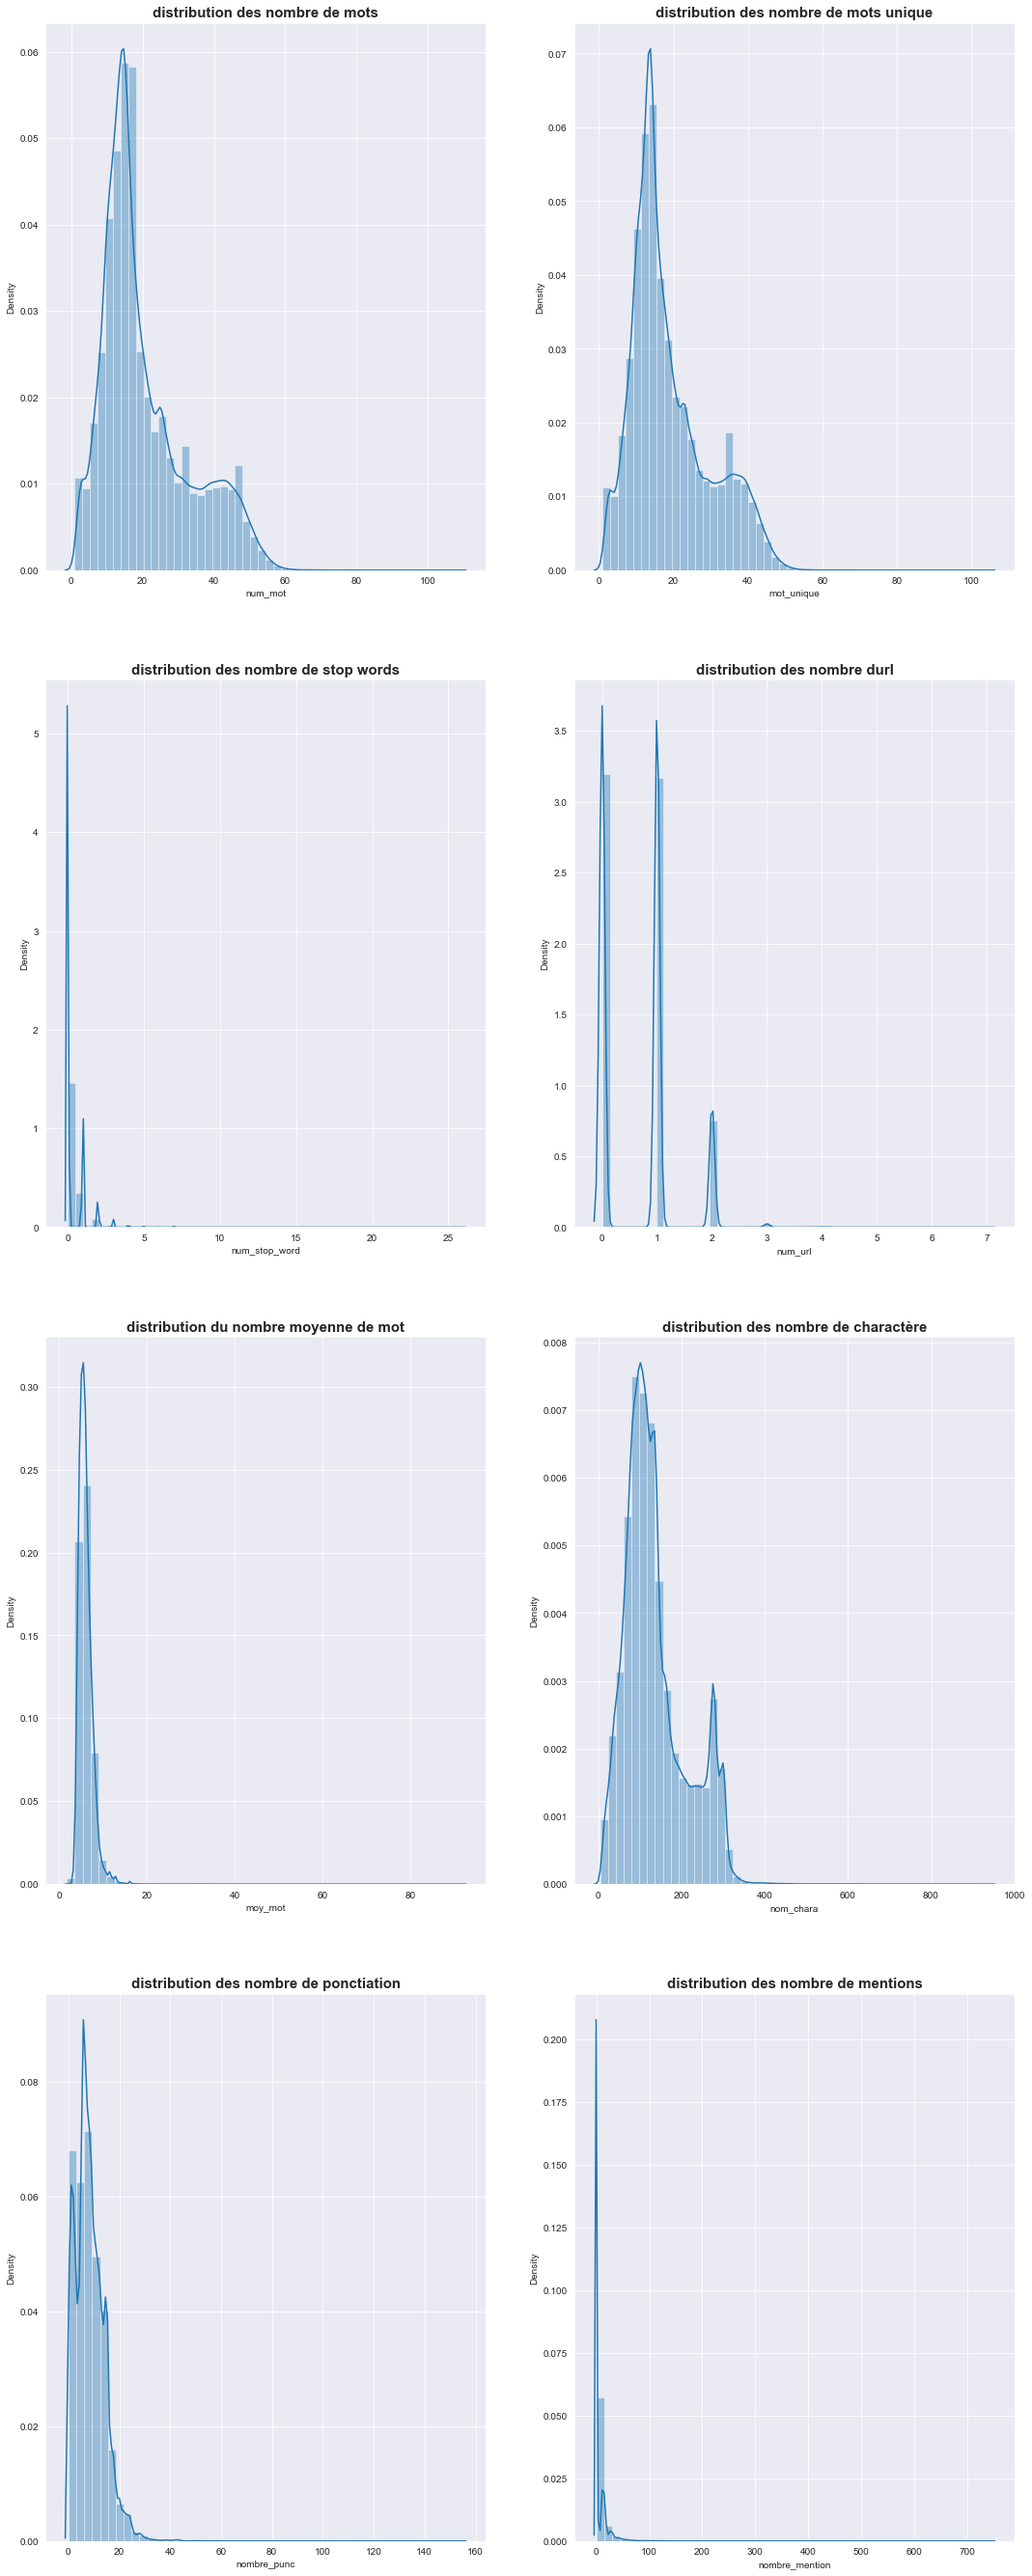

In [26]:
data['tweets_clean']=data['tweet_text'].apply(clean_tweets)
fig,ax=plt.subplots(ncols=2,nrows=4,figsize=(18,48))

sns.distplot(data['num_mot'],ax=ax[0][0]).set_title(label='distribution des nombre de mots',fontsize=15,fontweight='bold')
sns.distplot(data['mot_unique'],ax=ax[0][1]).set_title(label='distribution des nombre de mots unique',fontsize=15,fontweight='bold')
sns.distplot(data['num_stop_word'],ax=ax[1][0]).set_title(label='distribution des nombre de stop words',fontsize=15,fontweight='bold')
sns.distplot(data['num_url'],ax=ax[1][1]).set_title(label='distribution des nombre d''url',fontsize=15,fontweight='bold')
sns.distplot(data['moy_mot'],ax=ax[2][0]).set_title(label='distribution du nombre moyenne de mot',fontsize=15,fontweight='bold')
sns.distplot(data['nom_chara'],ax=ax[2][1]).set_title(label='distribution des nombre de charactère',fontsize=15,fontweight='bold')
sns.distplot(data['nombre_punc'],ax=ax[3][0]).set_title(label='distribution des nombre de ponctiation',fontsize=15,fontweight='bold')
sns.distplot(data['nombre_mention'],ax=ax[3][1]).set_title(label='distribution des nombre de mentions',fontsize=15,fontweight='bold')






plt.show()

In [465]:
corpus=[]

text=[]

for ii in range(len(data_cop['text_after_preprocess'])):
    text=data_cop['text_after_preprocess'][ii]
    corpus.append(text)
    
corpus[0:10]

['Un séisme majeur menace Istanbul Sciences²',
 'Tremblement terre M3 1 FRANCE 31km La Teste Buch ven 26 juil 2019 10 45 43 UTC 12 45 GMT 02 00 Il 17 minutes informations Volcanoes Erthquakes App',
 'Un séisme majeur menace Istanbul Sciences² Les phénomènes extrêmes nombreux petite période règne Homme Terre trembler commencer dès maintenant',
 'Un séisme majeur menace Istanbul Sciences²',
 'morte ça crie comme séisme',
 'Oui annoncent gros deprem grosse magnitude savent exactement quand peut produire Les médias turc parlés plusieurs fois',
 'Rappel tremblements terre causés sexe hors mariage',
 '_msd C quoi cette histoire déjà Selon imam tremblements terre provoqués femmes seins nus Ça donné lieu campagne boobshake moquer propos cet homme',
 '_Suenoo Tremblement terre gauche canicule droite jcomprend mieux pk',
 'vu parait avoir gros tremblement terre Istanbul']

In [466]:
stop_list =stop_word +list(string.punctuation)
texts = [[word for word in str(document).lower().split() if word not in stop_list] for document in corpus]
dictionary = corpora.Dictionary(texts)

In [467]:
corpus = [dictionary.doc2bow(text) for text in texts]

In [468]:
tfidf=models.TfidfModel(corpus)

In [469]:
corpus_tfidif=tfidf[corpus]

In [470]:
total_topics=5

lda_=models.LdaModel(corpus,id2word=dictionary,num_topics=total_topics)
corpus_lda=lda_[corpus_tfidif]

In [475]:
lda_.show_topics(total_topics,3)

[(0, '0.054*"séismes" + 0.035*"séisme" + 0.029*"etna"'),
 (1, '0.114*"séisme" + 0.068*"tsunami" + 0.054*"indonésie"'),
 (2, '0.097*"magnitude" + 0.052*"séisme" + 0.036*"4"'),
 (3, '0.110*"terre" + 0.089*"tremblement" + 0.017*"tremblements"'),
 (4, '0.056*"séisme" + 0.010*"après" + 0.009*"haïti"')]

In [472]:
! pip install pyLDAvis

In [476]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [477]:
pyLDAvis.enable_notebook()
vis= pyLDAvis.gensim_models.prepare(lda_, corpus_lda, dictionary, mds='tsne')

ValueError: perplexity must be less than n_samples

In [ ]:
vis


# Labelisation 
- si ID_evt >0 target =1
- la fréquence branche amine
- si le nombre de caractère >280 target =0
- si le nombre de mot <3 : target =0
- si le sentiment est postif avec un seuil de 0.85 target 0

- **sur ue data de 50000**


![](https://media2.giphy.com/media/xUPOqo6E1XvWXwlCyQ/giphy.gif)